# What is the purchasing behavior of customers in the Retail market?

## Introduction

In the dynamic world of retail, understanding customer behavior based on data is the key to continue growing and evolving in a world that is turning quickly. In this project, we seek to identify customer purchasing patterns in a retail company, using data analysis techniques such as RFM and Clustering. Our goal is to identify customer segments with similar characteristics, anticipate their needs and develop strategies that drive retention, customer satisfaction and the profitability and development of the company.

## General Objective:

To thoroughly understand the purchasing behavior of the retail company's customers.

Specific Objectives:

- To segment customers based on their Recency (R), Frequency (F) and Monetary Value (M) using RFM analysis.

- To analyze the identified customer segments using Clustering techniques.

- To identify the factors that influence the purchasing behavior of each customer segment.

## Initialization

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Data upload

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ysmarle/Online_Retail.csv', encoding='latin-1')

## Exploring the data

In [ ]:
df.shape

(541909, 8)

### DataFrame Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Data description:

- `'INVOICE_NO'` — invoice number
- `'STOCK_CODE'` — unique product identifier
- `'DESCRIPTION'` — product description
- `'QUANTITY'` — quantity of units of the product
- `'INVOICE_DATE'` — date the invoice was issued
- `'UNIT_PRICE'` — unit price of the product
- `'CUSTOMER_ID'` — customer identifier
- `'REGION'` — country where the purchase is generated

### Printing a sample of the data for the DataFrame

In [ ]:
df.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


### DataFrame Description

In [ ]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,QUANTITY,UNIT_PRICE,CUSTOMER_ID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
95%,29.000000,9.950000,17905.000000
99%,100.000000,18.000000,18212.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.describe(exclude=['int', 'float'])

,INVOICE_NO,STOCK_CODE,DESCRIPTION,INVOICE_DATE,REGION
count,541909,541909,540455,541909,541909
unique,25900,4070,4214,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31/10/2020 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


**Intermediate conclusion**

We have a DataFrame with eight columns and 541,909 rows. With missing and duplicate values.

It can be seen that in the QUANTITY and UNIT_PRICE columns there are negative values, which could suggest errors in the data, returns, discounts, inventory adjustments or errors in the system.

It could be that this is what is causing a standard deviation of 218 for QUANTITY and 96.8 for UNIT_PRICE, which may imply great dispersion in the quantities and prices of the products.

### Missing values

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
CUSTOMER_ID,135080
DESCRIPTION,1454
INVOICE_NO,0
STOCK_CODE,0
QUANTITY,0
INVOICE_DATE,0
UNIT_PRICE,0
REGION,0


In [ ]:
df.isna().sum().sort_values(ascending=False) / len(df) * 100

,0
CUSTOMER_ID,24.926694
DESCRIPTION,0.268311
INVOICE_NO,0.000000
STOCK_CODE,0.000000
QUANTITY,0.000000
INVOICE_DATE,0.000000
UNIT_PRICE,0.000000
REGION,0.000000


In [ ]:
region_counts = df['REGION'].value_counts().to_frame('count')
total = region_counts['count'].sum()
region_counts['percentage'] = (region_counts['count'] / total) * 100
region_counts

,count,percentage
REGION,,
United Kingdom,495478,91.431956
Germany,9495,1.752139
France,8557,1.579047
EIRE,8196,1.512431
Spain,2533,0.467422
Netherlands,2371,0.437527
Belgium,2069,0.381798
Switzerland,2002,0.369435
Portugal,1519,0.280305


In [ ]:
description_counts = df['DESCRIPTION'].value_counts().to_frame('count')
total = description_counts['count'].sum()
description_counts['percentage'] = (description_counts['count'] / total) * 100
description_counts.head(10)

,count,percentage
DESCRIPTION,,
WHITE HANGING HEART T-LIGHT HOLDER,2369,0.438334
REGENCY CAKESTAND 3 TIER,2200,0.407064
JUMBO BAG RED RETROSPOT,2159,0.399478
PARTY BUNTING,1727,0.319546
LUNCH BAG RED RETROSPOT,1638,0.303078
ASSORTED COLOUR BIRD ORNAMENT,1501,0.277729
SET OF 3 CAKE TINS PANTRY DESIGN,1473,0.272548
PACK OF 72 RETROSPOT CAKE CASES,1385,0.256266
LUNCH BAG BLACK SKULL.,1350,0.249790


In [ ]:
customer_id_counts = df['CUSTOMER_ID'].value_counts().to_frame('count')
total = customer_id_counts['count'].sum()
customer_id_counts['percentage'] = (customer_id_counts['count'] / total) * 100
customer_id_counts.head(10)

,count,percentage
CUSTOMER_ID,,
17841.0,7983,1.962249
14911.0,5903,1.450978
14096.0,5128,1.260480
12748.0,4642,1.141020
14606.0,2782,0.683825
15311.0,2491,0.612297
14646.0,2085,0.512500
13089.0,1857,0.456457
13263.0,1677,0.412213


### Duplicate values

In [ ]:
len(df.drop_duplicates()) == len(df)

False

In [ ]:
df.duplicated().sum()

5268

In [ ]:
# Review duplicate records in the clean dataset
duplicated_records = df.duplicated()

perc_duplicated_records = (duplicated_records.sum() / len(df)) * 100
print(f"Percentage of duplicate records: {perc_duplicated_records:.2f}%")

Percentage of duplicate records: 0.97%


### Exploring unique values

In [ ]:
df["REGION"].sort_values().unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

**Intermediate conclusion**

The missing values ​​are in the CUSTOMER_ID columns representing approximately 25%, and in DESCRIPTION with approximately 0.3%. As the project focuses on customer segmentation, null values ​​of CUSTOMER_ID will not help us train a model since we cannot segment customers without identifying them. Therefore, we will not use null CUSTOMER_ID records for the model. However, we will not delete these logs immediately as they may be useful for other exploratory analyses.

The duplicate values ​​are 5,268 rows, representing 0.97%, which is why they may be removed from the dataset later.

## Data preprocessing

### Fix date_posted data types

In [ ]:
# Convert INVOICE_DATE to datetime type
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format='%d/%m/%Y %H:%M')

### Enriching the data

Improving data types

In [ ]:
df['month_year'] = df['INVOICE_DATE'].dt.strftime('%Y-%m')

## Exploratory data analysis (EDA)



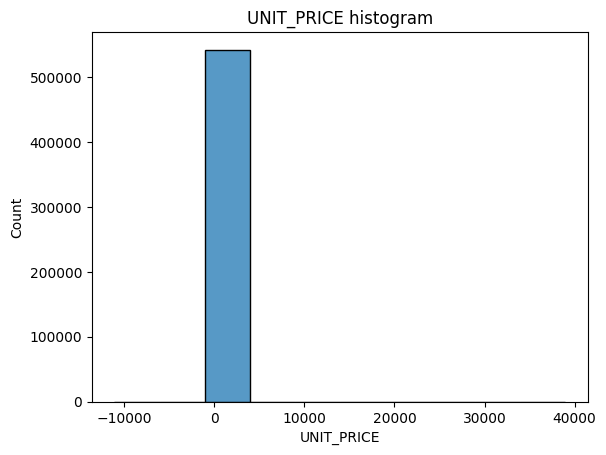

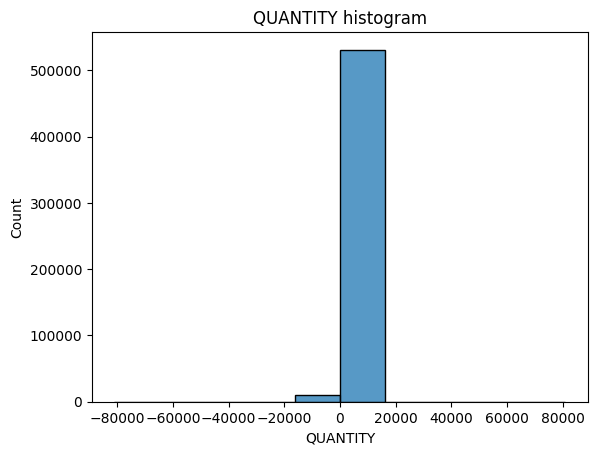

In [ ]:
# Unit price and quantity distribution
def unit_price_histogram(df, parametros):

    for parametro in parametros:
        sns.histplot(data=df, x=parametro, bins=10)
        plt.title(f"{parametro} histogram")
        plt.xlabel(f"{parametro}")
        plt.show()

parameters = ["UNIT_PRICE", "QUANTITY"]
unit_price_histogram(df, parameters)

- `'UNIT_PRICE'` : since we have a high concentration of unit prices very close to zero that are affecting our visualization, we are going to adjust the histogram to exclude extreme values ​​and better visualize the common data.
- `'QUANTITY'` : Negative values ​​will be explored in greater depth.

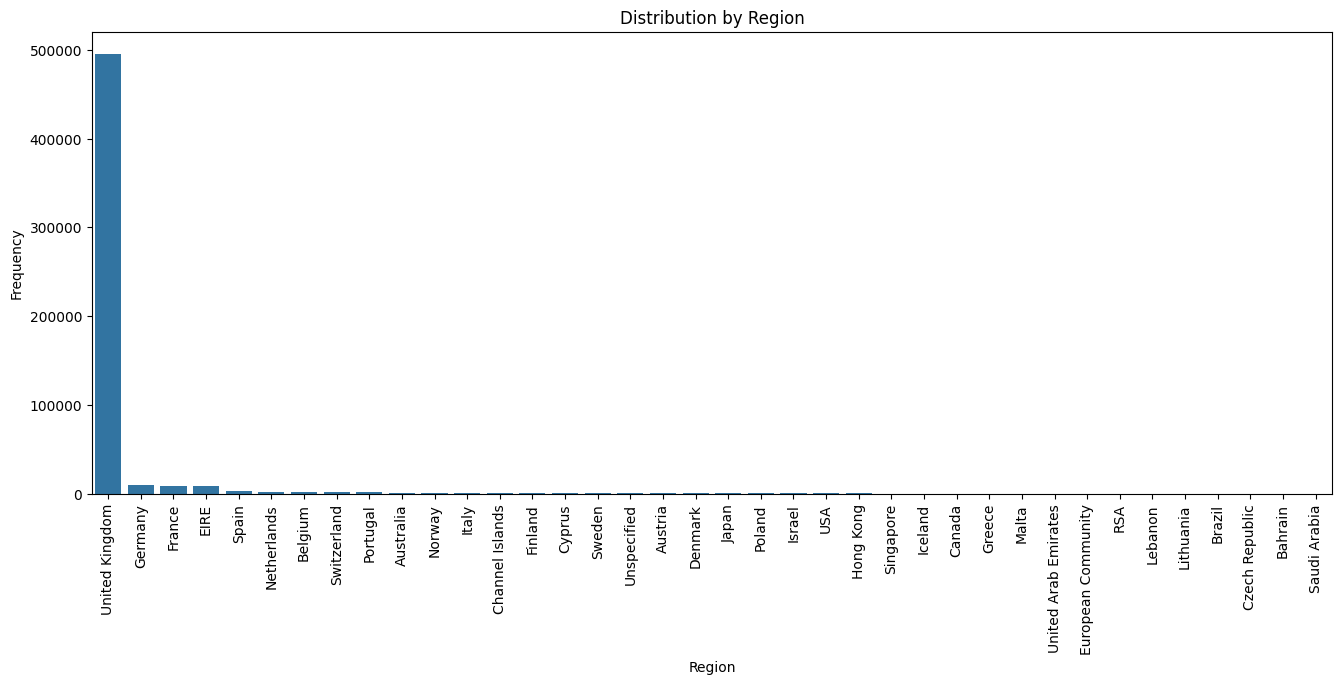

In [ ]:
# distribution graph by Region
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='REGION', order=df['REGION'].value_counts().index)
plt.title('Distribution by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

The region with the highest sales volume is the United Kingdom with 91% of total sales. Followed by Germany, France, EIRE and Spain.

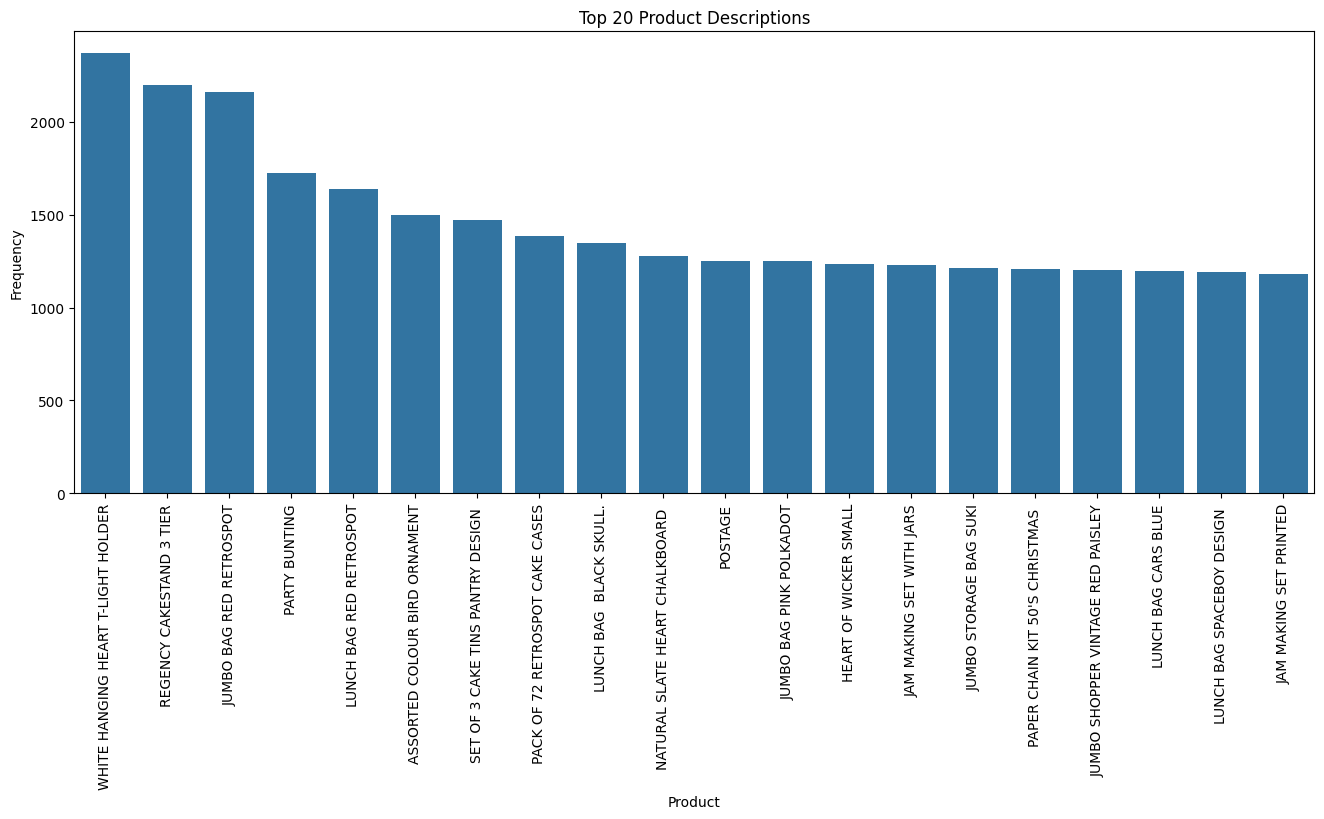

In [ ]:
# Bar graph Top 20 Products
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='DESCRIPTION', order=df['DESCRIPTION'].value_counts().head(20).index)
plt.title('Top 20 Product Descriptions')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

The 10 best-selling products are:
- WHITE HANGING HEART T-LIGHT HOLDER
- REGENCY CAKESTAND 3 TIER
- JUMBO BAG RED RETROSPOT
- PARTY BUNTING
- LUNCH BAG RED RETROSPOT
- ASSORTED COLOUR BIRD ORNAMENT
- SET OF 3 CAKE TINS PANTRY DESIGN
- PACK OF 72 RETROSPOT CAKE CASES
- LUNCH BAG BLACK SKULL
- NATURAL SLATE HEART CHALKBOARD

In summary it would be decoration, pastry and kitchen products.

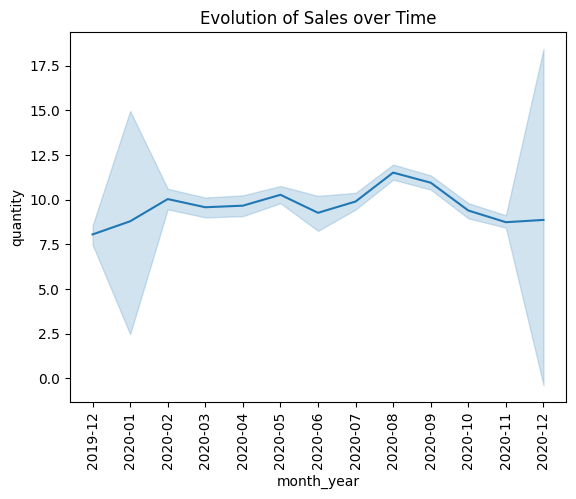

In [ ]:
# Sales Line Charts
sns.lineplot(data=df, x='month_year', y='QUANTITY')

plt.title('Evolution of Sales over Time')
plt.xlabel('month_year')
plt.ylabel('quantity')
plt.xticks(rotation=90)
plt.show()

The months where the most products are sold are in July, August and September. It could be because of school holidays; However, when treating the outliers we will see if these results are maintained.

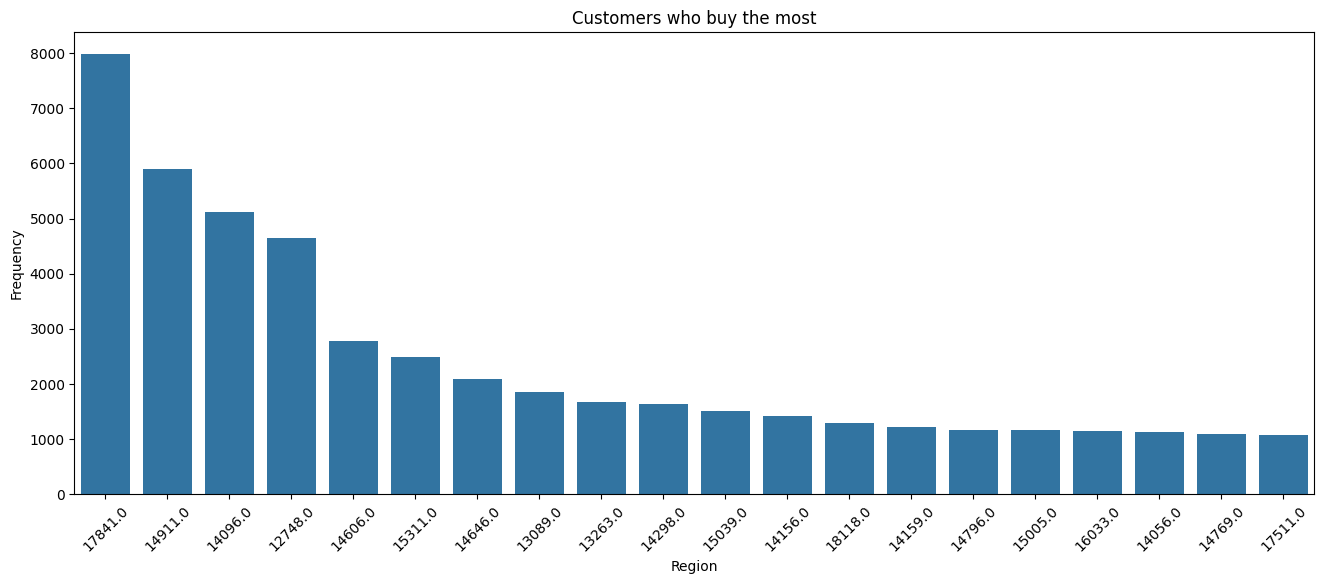

In [ ]:
# Bar graphs of customers who buy the most
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='CUSTOMER_ID', order=df['CUSTOMER_ID'].value_counts().head(20).index)
plt.title('Customers who buy the most')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

In [ ]:
customer_id_counts.head()

,count,percentage
CUSTOMER_ID,,
17841.0,7983,1.962249
14911.0,5903,1.450978
14096.0,5128,1.260480
12748.0,4642,1.141020
14606.0,2782,0.683825


The table *customer_id_counts* displays the first five customers with the highest purchase units

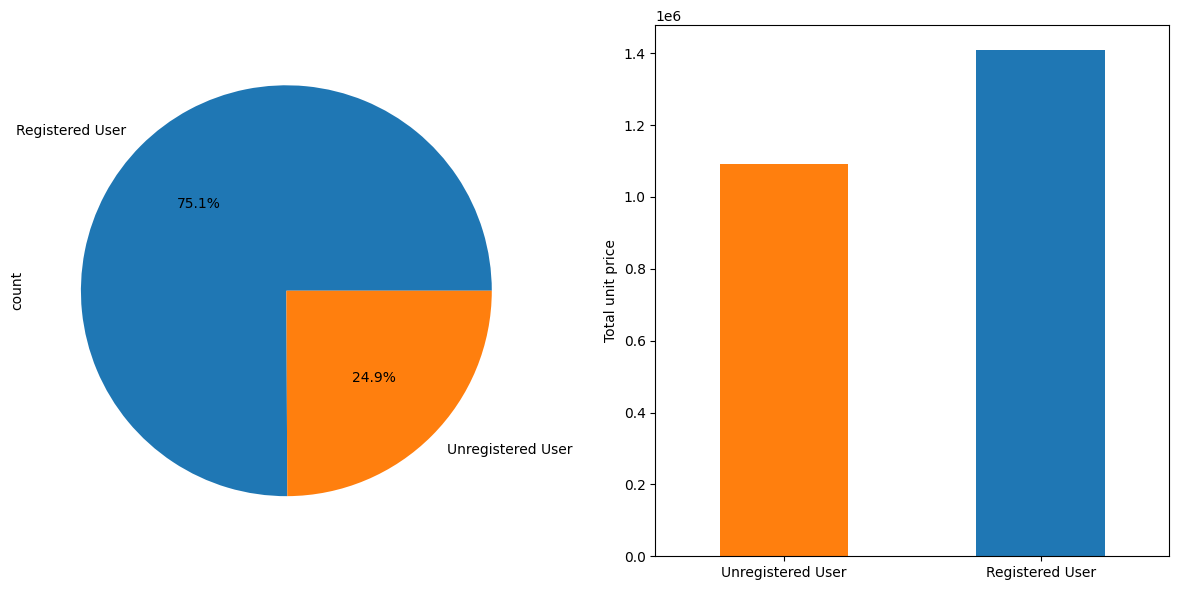

In [ ]:
# Sales of registered vs. unregistered customers
def convert_to_boolean(value):
    return value >= 0

df['registered_customers'] = df['CUSTOMER_ID'].apply(convert_to_boolean)

# Group by registration status and calculate total purchase amount
purchases_per_user = df.groupby('registered_customers')['UNIT_PRICE'].sum()
purchases_per_user.index = ['Unregistered User', 'Registered User']

# Calculate the number of registered and unregistered customers (optional, but useful for pie chart)
register_customers = df['registered_customers'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart (left)
register_customers.plot.pie(
    labels=['Registered User', 'Unregistered User'],
    autopct='%1.1f%%',
    colors=['tab:blue', 'tab:orange'],  # Specify colors from the tab20 palette
    ax=axes[0]
)

# Bar chart (right)
purchases_per_user.plot.bar(
    rot=0,
    color=['tab:orange', 'tab:blue'],  # Use the same colors
    ax=axes[1]
)
#axes[1].set_title('Registered users vs unregistered users')
axes[1].set_ylabel('Total unit price')

plt.tight_layout()
plt.show()

In the pie chart you can see that 75% of registered customers are registered customers and the rest are unregistered customers. And in the bar chart, despite this difference, at the level of sales per price unit, 56% are of registered users, and 44% of sales in unregistered users, with a difference of 316,836 USD

## Study and deal with outliers

### UNIT_PRICE

#### Distribution of UNIT_PRICE

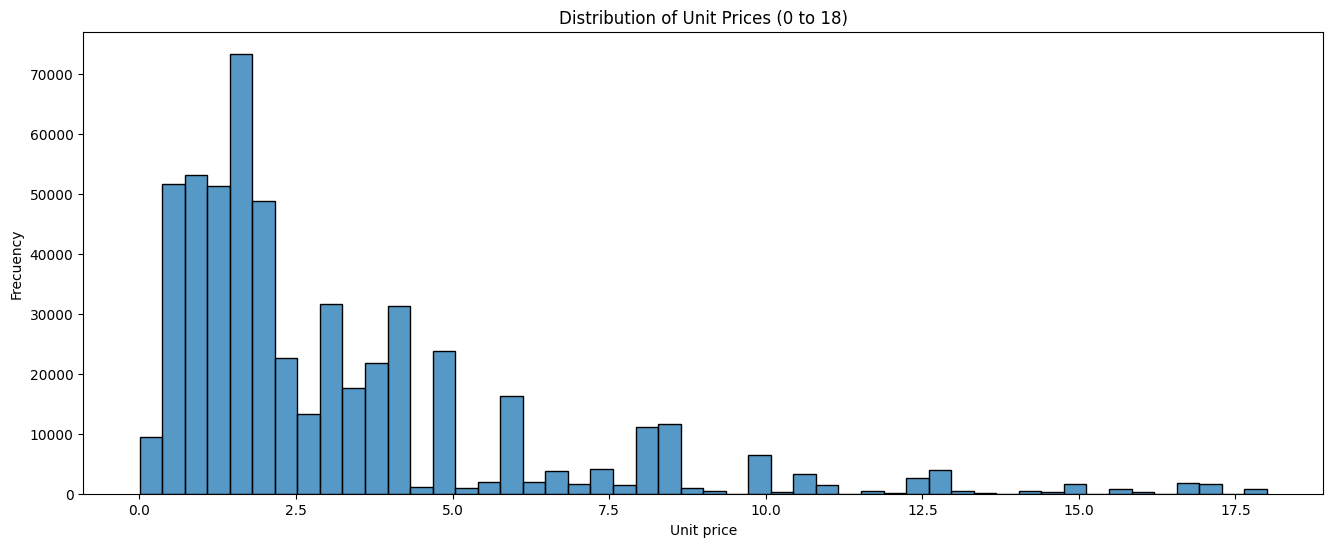

In [ ]:
# Filter data for unit prices greater than 0 and less than or equal to 18
df_filtered = df[(df['UNIT_PRICE'] > 0) & (df['UNIT_PRICE'] <= 18)]

# Distribution of unit prices within the filtered range
plt.figure(figsize=(16, 6))
sns.histplot(df_filtered['UNIT_PRICE'], bins=50)
plt.title('Distribution of Unit Prices (0 to 18)')
plt.xlabel('Unit price')
plt.ylabel('Frecuency')
plt.show()

Since a better distribution of unit prices can be seen, extreme data will be analyzed to better understand its impact on the data.

#### Analysis of Atypical prices ​​in UNIT_PRICE

---



In [ ]:
# UNIT_PRICE Atypical prices
atypical_prices = df[(df['UNIT_PRICE'] > 1000) | (df['UNIT_PRICE'] < 0)]

print("Atypical prices ​​in UNIT_PRICE:")
atypical_prices.describe()

Atypical prices ​​in UNIT_PRICE:


,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID
count,122.000000,122,122.000000,46.000000
mean,-0.090164,2020-07-14 08:44:05.901639168,3759.296393,14173.804348
min,-2.000000,2019-12-07 15:04:00,-11062.060000,12503.000000
25%,-1.000000,2020-04-04 13:08:15,1273.495000,12744.000000
50%,-1.000000,2020-08-05 12:41:30,2043.085000,14096.000000
75%,1.000000,2020-10-30 13:37:15,5062.682500,15301.250000
max,1.000000,2020-12-09 10:26:00,38970.000000,18102.000000
std,1.012354,NaN,5174.857618,1744.051676


In [ ]:
# the top 20 UNIT_PRICE atypical prices
atypical_prices.head(20)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:04:00,13541.33,NaN,United Kingdom,2019-12,False
15017,537632,AMAZONFEE,AMAZON FEE,1,2019-12-07 15:08:00,13541.33,NaN,United Kingdom,2019-12,False
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:34:00,13474.79,NaN,United Kingdom,2019-12,False
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:41:00,5519.25,NaN,United Kingdom,2019-12,False
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:49:00,13541.33,NaN,United Kingdom,2019-12,False
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2019-12-07 15:51:00,6706.71,NaN,United Kingdom,2019-12,False
28994,C538682,M,Manual,-1,2019-12-13 17:14:00,1130.90,NaN,United Kingdom,2019-12,False
41448,539856,M,Manual,1,2019-12-22 14:41:00,1298.40,NaN,United Kingdom,2019-12,False
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2020-01-05 09:55:00,16888.02,NaN,United Kingdom,2020-01,False
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2020-01-05 09:57:00,16453.71,NaN,United Kingdom,2020-01,False


In [ ]:
# Counting descriptions in atypical prices
atypical_prices_descriptions = atypical_prices['DESCRIPTION'].value_counts()
atypical_prices_descriptions.head(10)

,count
DESCRIPTION,
Manual,54
AMAZON FEE,31
DOTCOM POSTAGE,28
Adjust bad debt,3
POSTAGE,2
CRUK Commission,2
Bank Charges,1
Discount,1


**Conclusion Atypical_prices**

In the atypical_prices DataFrame, in the QUANTITY column there are negative values ​​that do not represent typical sales, but rather additional charges or financial adjustments. And in atypical_prices_descriptions these descriptions are verified in detail to make informed decisions about how to handle them.

#### Zero price analysis

In [ ]:
# Filter records with UNIT_PRICE equal to 0
df_zero = df[df['UNIT_PRICE'] == 0]

description_counts = df_zero['DESCRIPTION'].value_counts(dropna=False)
print("Count of unique values ​​in DESCRIPTION (including NaN):")
df_zero.describe()

Count of unique values ​​in DESCRIPTION (including NaN):


,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID
count,2515.000000,2515,2515.0,40.000000
mean,-53.421074,2020-06-06 16:04:25.407554560,0.0,14217.225000
min,-9600.000000,2019-12-01 11:52:00,0.0,12415.000000
25%,-32.000000,2020-03-18 11:02:00,0.0,12722.750000
50%,-1.000000,2020-05-23 15:30:00,0.0,13985.000000
75%,3.000000,2020-09-19 16:58:00,0.0,15225.500000
max,12540.000000,2020-12-08 15:24:00,0.0,18059.000000
std,540.206783,NaN,0.0,1676.321178


In [ ]:
df_zero.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers
622,536414,22139,NaN,56,2019-12-01 11:52:00,0.0,NaN,United Kingdom,2019-12,False
1970,536545,21134,NaN,1,2019-12-01 14:32:00,0.0,NaN,United Kingdom,2019-12,False
1971,536546,22145,NaN,1,2019-12-01 14:33:00,0.0,NaN,United Kingdom,2019-12,False
1972,536547,37509,NaN,1,2019-12-01 14:33:00,0.0,NaN,United Kingdom,2019-12,False
1987,536549,85226A,NaN,1,2019-12-01 14:34:00,0.0,NaN,United Kingdom,2019-12,False


In [ ]:
# Counting descriptions in atypical prices
df_zero_descriptions = df_zero['DESCRIPTION'].value_counts()
df_zero_descriptions.head(20)

,count
DESCRIPTION,
check,159
?,47
damages,45
damaged,43
found,25
sold as set on dotcom,20
adjustment,16
Damaged,14
Unsaleable destroyed.,9


**Conclusion Zero price**

In this analysis of UNIT_PRICE equal to zero, it is evident that there are missing values ​​in CUSTOMER_ID and DESCRIPTION. And where are the values ​​in the description, the most relevant are check, ?, damaged.


In [ ]:
# Filter records with UNIT_PRICE equal to 0 and DESCRIPTION blank (NaN)
df_zero_nan = df[(df['UNIT_PRICE'] == 0) & (df['DESCRIPTION'].isnull())]

print("Atypical prices ​​in UNIT_PRICE:")
df_zero_nan.describe()

Atypical prices ​​in UNIT_PRICE:


,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID
count,1454.000000,1454,1454.0,0.0
mean,-9.359697,2020-05-22 13:39:20.508940800,0.0,NaN
min,-3667.000000,2019-12-01 11:52:00,0.0,NaN
25%,-24.000000,2020-03-22 17:04:15,0.0,NaN
50%,-3.000000,2020-05-03 13:35:30,0.0,NaN
75%,4.000000,2020-08-04 15:42:45,0.0,NaN
max,5568.000000,2020-12-08 14:06:00,0.0,NaN
std,243.238758,NaN,0.0,NaN


In [ ]:
# Show a sample of these records
print("Records with UNIT_PRICE equal to 0 and DESCRIPTION blank (NaN):")
df_zero_nan.head(20)

Records with UNIT_PRICE equal to 0 and DESCRIPTION blank (NaN):


,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers
622,536414,22139,NaN,56,2019-12-01 11:52:00,0.0,NaN,United Kingdom,2019-12,False
1970,536545,21134,NaN,1,2019-12-01 14:32:00,0.0,NaN,United Kingdom,2019-12,False
1971,536546,22145,NaN,1,2019-12-01 14:33:00,0.0,NaN,United Kingdom,2019-12,False
1972,536547,37509,NaN,1,2019-12-01 14:33:00,0.0,NaN,United Kingdom,2019-12,False
1987,536549,85226A,NaN,1,2019-12-01 14:34:00,0.0,NaN,United Kingdom,2019-12,False
1988,536550,85044,NaN,1,2019-12-01 14:34:00,0.0,NaN,United Kingdom,2019-12,False
2024,536552,20950,NaN,1,2019-12-01 14:34:00,0.0,NaN,United Kingdom,2019-12,False
2025,536553,37461,NaN,3,2019-12-01 14:35:00,0.0,NaN,United Kingdom,2019-12,False
2026,536554,84670,NaN,23,2019-12-01 14:35:00,0.0,NaN,United Kingdom,2019-12,False
2406,536589,21777,NaN,-10,2019-12-01 16:50:00,0.0,NaN,United Kingdom,2019-12,False


In [ ]:
print(f"Percentage of records with UNIT_PRICE equal to 0 and DESCRIPTION blank (NaN): {(len(df_zero_nan) / len(df)) * 100:.2f}%")

Percentage of records with UNIT_PRICE equal to 0 and DESCRIPTION blank (NaN): 0.27%


**Conclusion Zero and NaN**

For records where the unit price (UNIT_PRICE) is equal to zero, the concept in the description (DESCRIPTION) that occurs most are the NaN values, which constitute 0.27% of the total data. These records also have only NaN values ​​in the customer ID column (CUSTOMER_ID). Therefore, it is recommended not to consider these records and proceed with their deletion.

#### Analysis of negative values

In [ ]:
# Negative values ​​in UNIT_PRICE
negative_unit_price = df[df['UNIT_PRICE'] < 0]

print("Negative values ​​in UNIT_PRICE:")
negative_unit_price.describe()

Negative values ​​in UNIT_PRICE:


,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID
count,2.0,2,2.00,0.0
mean,1.0,2020-08-12 14:51:30,-11062.06,NaN
min,1.0,2020-08-12 14:51:00,-11062.06,NaN
25%,1.0,2020-08-12 14:51:15,-11062.06,NaN
50%,1.0,2020-08-12 14:51:30,-11062.06,NaN
75%,1.0,2020-08-12 14:51:45,-11062.06,NaN
max,1.0,2020-08-12 14:52:00,-11062.06,NaN
std,0.0,NaN,0.00,NaN


In [ ]:
# top of negative unit_price values
negative_unit_price.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers
299983,A563186,B,Adjust bad debt,1,2020-08-12 14:51:00,-11062.06,NaN,United Kingdom,2020-08,False
299984,A563187,B,Adjust bad debt,1,2020-08-12 14:52:00,-11062.06,NaN,United Kingdom,2020-08,False


**Conclusion values ​​less than zero**

Only two values ​​less than zero are evident, referring to Adjust bad debt, with NaN in CUSTOMER_ID.

### QUANTITY

#### Distribution of QUANTITY

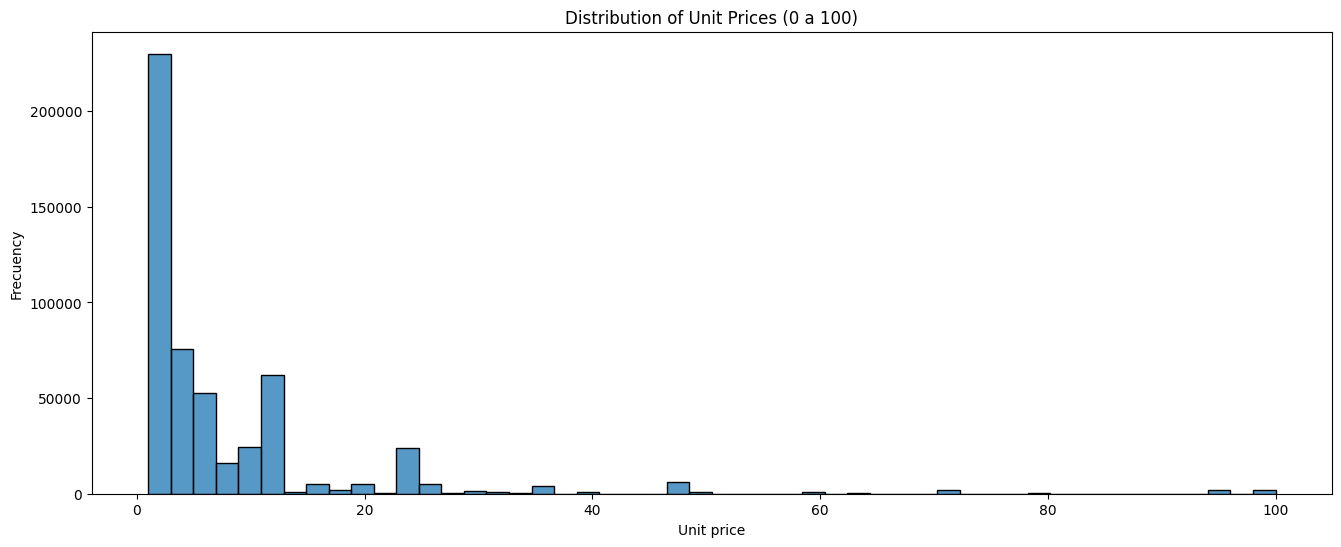

In [ ]:
# Filter data for unit prices in a reasonable range
df_filtered_q = df[(df['QUANTITY'] >= 1) & (df['QUANTITY'] <= 100)]

# Distribution of unit prices within the filtered range
plt.figure(figsize=(16, 6))
sns.histplot(df_filtered_q['QUANTITY'], bins=50)
plt.title('Distribution of Unit Prices (0 a 100)')
plt.xlabel('Unit price')
plt.ylabel('Frecuency')
plt.show()

#### Analysis of Atypical quantities ​​in QUANTITY

In [ ]:
# Filter records with negative QUANTITY
negative_quantities = df[df['QUANTITY'] <= 0]

print("Negative values ​​in UNIT_PRICE:")
negative_quantities.describe()

Negative values ​​in UNIT_PRICE:


,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID
count,10624.000000,10624,10624.000000,8905.000000
mean,-45.607210,2020-06-24 14:45:04.647966720,42.308012,14991.667266
min,-80995.000000,2019-12-01 09:41:00,0.000000,12346.000000
25%,-10.000000,2020-03-24 11:23:15,1.060000,13510.000000
50%,-2.000000,2020-07-04 15:57:00,2.100000,14895.000000
75%,-1.000000,2020-10-06 19:52:00,4.950000,16393.000000
max,-1.000000,2020-12-09 11:58:00,38970.000000,18282.000000
std,1092.214216,NaN,623.481552,1706.772357


In [ ]:
# Show a sample of these records
print("Negative values ​​in QUANTITY:")
negative_quantities.head(20)

Negative values ​​in QUANTITY:


,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers
141,C536379,D,Discount,-1,2019-12-01 09:41:00,27.50,14527.0,United Kingdom,2019-12,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311.0,United Kingdom,2019-12,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2019-12-01 10:24:00,1.65,17548.0,United Kingdom,2019-12,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548.0,United Kingdom,2019-12,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548.0,United Kingdom,2019-12,True
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2019-12-01 10:24:00,0.29,17548.0,United Kingdom,2019-12,True
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2019-12-01 10:24:00,3.45,17548.0,United Kingdom,2019-12,True
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2019-12-01 10:24:00,1.65,17548.0,United Kingdom,2019-12,True
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2019-12-01 10:24:00,1.65,17548.0,United Kingdom,2019-12,True
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2019-12-01 12:38:00,4.25,17897.0,United Kingdom,2019-12,True


In [ ]:
# Description of negative values ​​by quantity
print("Description of negative values ​​by quantity:")
negative_quantities_descriptions = negative_quantities['DESCRIPTION'].value_counts()
negative_quantities_descriptions.head(10)

Description of negative values ​​by quantity:


,count
DESCRIPTION,
Manual,244
REGENCY CAKESTAND 3 TIER,181
POSTAGE,126
check,120
JAM MAKING SET WITH JARS,87
Discount,77
SET OF 3 CAKE TINS PANTRY DESIGN,74
SAMPLES,61
STRAWBERRY CERAMIC TRINKET BOX,55


**Intermediate conclusion**

Different records are evident with a negative quantity, this could represent returns, discounts, samples, inventory adjustment or error.

## Data Set Cleanup

Since it has been decided which values ​​are useful to us and which are not, we proceed to clean the Dataset to be able to make an AED that provides more information.

#### Removal of duplicates

In [ ]:
# # Remove duplicate records, DataFrame includes unregistered clients
new_df = df.drop_duplicates()

# Verify that duplicates have been removed
num_duplicated_records_after = new_df.duplicated().sum()
print(f"Number of duplicate records after deleting: {num_duplicated_records_after}")

Number of duplicate records after deleting: 0


#### Removal of unregistered clients

Records with Null CUSTOMER_ID will be deleted first.

In [ ]:
# Delete null records in CUSTOMER_ID
df_clean = new_df.dropna(subset=['CUSTOMER_ID'])

# Verify that null values ​​have been removed
null_records_CUSTOMERID = df_clean.isnull().sum()
print(f"Number of records with nulls after deleting: {null_records_CUSTOMERID}")

Number of records with nulls after deleting: INVOICE_NO              0
STOCK_CODE              0
DESCRIPTION             0
QUANTITY                0
INVOICE_DATE            0
UNIT_PRICE              0
CUSTOMER_ID             0
REGION                  0
month_year              0
registered_customers    0
dtype: int64


In [ ]:
# CUSTOMER_ID must be of type int64 because it represents a numeric identifier without decimals

df_clean['CUSTOMER_ID'] = df_clean['CUSTOMER_ID'].astype(int)

# Verificar los cambios
print(df_clean.dtypes)

INVOICE_NO                      object
STOCK_CODE                      object
DESCRIPTION                     object
QUANTITY                         int64
INVOICE_DATE            datetime64[ns]
UNIT_PRICE                     float64
CUSTOMER_ID                      int64
REGION                          object
month_year                      object
registered_customers              bool
dtype: object


<ipython-input-46-ec35c87630ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CUSTOMER_ID'] = df_clean['CUSTOMER_ID'].astype(int)


#### Delete sales with zero value

In [ ]:
# DataFrame with values ​​in UNIT_PRICE less than or equal to zero
df_clean_unitprice = new_df.drop(new_df[new_df['UNIT_PRICE'] <= 0].index)

# verifying that values ​​less than and equal to zero were removed
less_cero_UNIT_PRICE_ = df_clean_unitprice.isnull().sum()
print(f"Number of records with values ​​less than and equal to zero after deleting them: {less_cero_UNIT_PRICE_}")

Number of records with values ​​less than and equal to zero after deleting them: INVOICE_NO                   0
STOCK_CODE                   0
DESCRIPTION                  0
QUANTITY                     0
INVOICE_DATE                 0
UNIT_PRICE                   0
CUSTOMER_ID             132565
REGION                       0
month_year                   0
registered_customers         0
dtype: int64


In [ ]:
print(f"Number of records after cleaning: {len(df_clean_unitprice)}")
print(f"{round(len(df_clean_unitprice)/df.shape[0]*100,2)}% of the data is preserved.")

Number of records after cleaning: 534129
98.56% of the data is preserved.


In [ ]:
# DataFrame with values ​​in UNIT_PRICE less than or equal to zero
df_clean = df_clean.drop(df_clean[df_clean['UNIT_PRICE'] <= 0].index)

# verifying that values ​​less than and equal to zero were removed
less_cero_UNIT_PRICE = df_clean.isnull().sum()
print(f"Number of records with values ​​less than and equal to zero after deleting them: {less_cero_UNIT_PRICE}")

Number of records with values ​​less than and equal to zero after deleting them: INVOICE_NO              0
STOCK_CODE              0
DESCRIPTION             0
QUANTITY                0
INVOICE_DATE            0
UNIT_PRICE              0
CUSTOMER_ID             0
REGION                  0
month_year              0
registered_customers    0
dtype: int64


In [ ]:
print(f"Number of records after cleaning: {len(df_clean)}")
print(f"{round(len(df_clean)/df.shape[0]*100,2)}% of the data is preserved.")

Number of records after cleaning: 401564
74.1% of the data is preserved.


## Exploitative Data Analysis (EDA) II - all clients

In [ ]:
df_clean_unitprice.describe(include='all')

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers
count,534129,534129,534129,534129.000000,534129,534129.000000,401564.000000,534129,534129,534129
unique,23796,3938,4033,NaN,NaN,NaN,NaN,38,13,2
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,2020-11,True
freq,1114,2295,2353,NaN,NaN,NaN,NaN,487806,83077,401564
mean,NaN,NaN,NaN,9.916818,2020-07-04 07:22:07.522115840,4.695864,15281.266797,NaN,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,2019-12-01 08:26:00,0.001000,12346.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,2020-03-28 11:36:00,1.250000,13939.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000,2020-07-19 15:55:00,2.100000,15145.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,10.000000,2020-10-18 17:10:00,4.130000,16788.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,80995.000000,2020-12-09 12:50:00,38970.000000,18287.000000,NaN,NaN,NaN


In [ ]:
df_clean_unitprice[df_clean_unitprice['QUANTITY']<0].sample(5)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers
337784,C566472,47566,PARTY BUNTING,-8,2020-09-12 18:19:00,4.95,16187.0,United Kingdom,2020-09,True
328090,C565752,21686,MEDINA STAMPED METAL STOOL,-1,2020-09-06 12:58:00,39.95,17841.0,United Kingdom,2020-09,True
142331,C548576,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,-1,2020-04-01 10:46:00,4.25,15696.0,United Kingdom,2020-04,True
414289,C572444,POST,POSTAGE,-1,2020-10-24 12:12:00,15.53,NaN,United Kingdom,2020-10,False
419732,C572855,23245,SET OF 3 REGENCY CAKE TINS,-2,2020-10-26 12:28:00,4.95,15215.0,United Kingdom,2020-10,True


In [ ]:
df_clean_unitprice[df_clean_unitprice['INVOICE_NO'].str.startswith('C')].describe()

,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID
count,9251.000000,9251,9251.000000,8872.000000
mean,-29.787050,2020-06-26 02:12:42.858069248,48.570430,14990.152953
min,-80995.000000,2019-12-01 09:41:00,0.010000,12346.000000
25%,-6.000000,2020-03-21 16:26:00,1.450000,13505.000000
50%,-2.000000,2020-07-08 13:04:00,2.950000,14868.000000
75%,-1.000000,2020-10-06 20:36:00,5.950000,16393.000000
max,-1.000000,2020-12-09 11:58:00,38970.000000,18282.000000
std,1147.997592,NaN,667.926393,1708.230387


In [ ]:
# Customer transactions with cancellations
df_clean_unitprice_C = df_clean_unitprice[df_clean_unitprice['INVOICE_NO'].str.startswith('C')]
print("Percentage of products with negative quantity ",round(df_clean_unitprice_C.shape[0]/df_clean_unitprice.shape[0]*100, 2),"")

Percentage of products with negative quantity  1.73 


It is determined that all products whose INVOICE_NO begins with C are because the transaction was cancelled and the products returned, which causes negative quantities.

In [ ]:
# Customer transactions excluding cancellations
df_clean_unitprice_WoC = df_clean_unitprice[~df_clean_unitprice['INVOICE_NO'].str.startswith('C')]

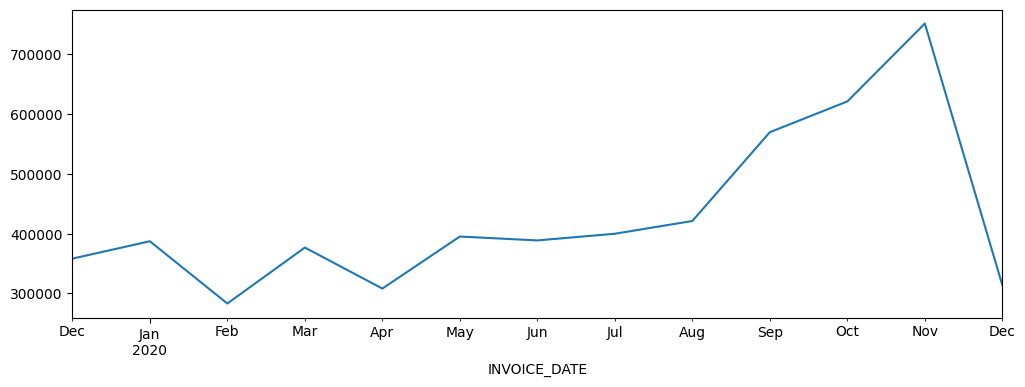

In [ ]:
# Quantity of products purchased over time
df_clean_unitprice_WoC.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().plot(figsize=(12,4))
plt.show()

In [ ]:
# make number of cancellations positive amount
df_clean_unitprice_C['QUANTITY'] = df_clean_unitprice_C['QUANTITY']*(-1)

<ipython-input-57-e6714e58521b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_unitprice_C['QUANTITY'] = df_clean_unitprice_C['QUANTITY']*(-1)


<Axes: xlabel='INVOICE_DATE'>

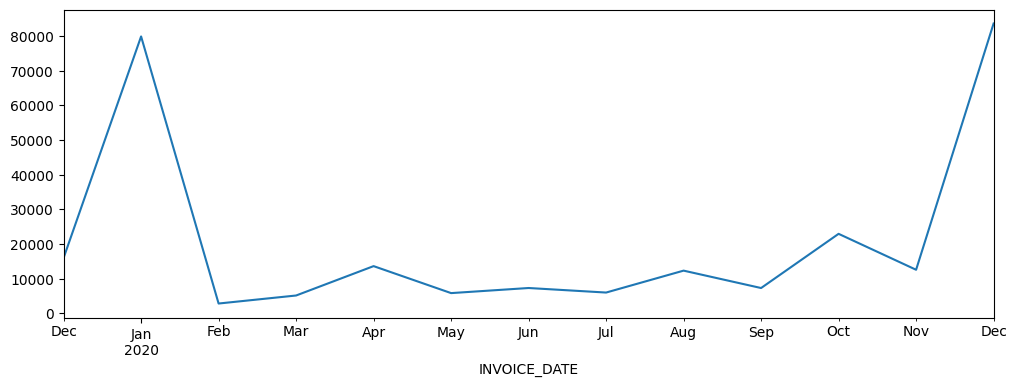

In [ ]:
# Number of products returned/cancelled over time
df_clean_unitprice_C.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().plot(figsize=(12,4))

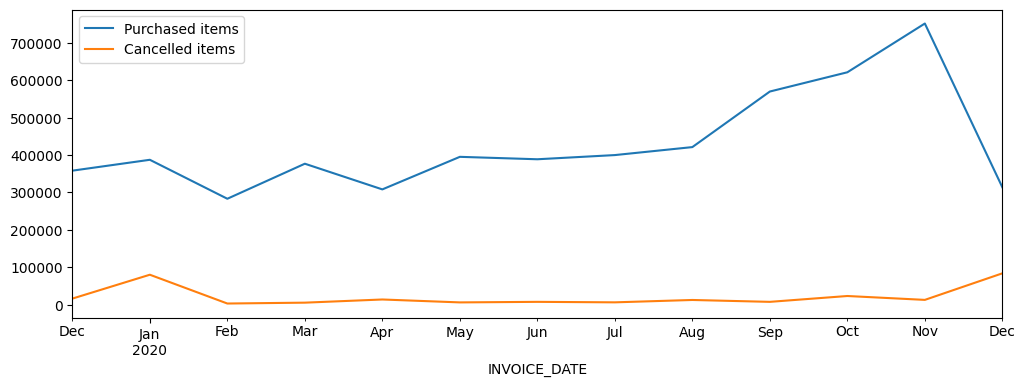

In [ ]:
# Cancelled items vs purchased items
ax = df_clean_unitprice_WoC.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().plot()
df_clean_unitprice_C.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().plot(ax=ax, figsize=(12,4))
ax.legend(["Purchased items", "Cancelled items"]);
plt.show()

## Exploited Data Analysis (EDA) II - registered customers

Now with the data clean, let's explore it a little more to understand it and see if it needs more cleaning.

### Data Description II

In [ ]:
df_clean.describe()

,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID
count,401564.000000,401564,401564.000000,401564.000000
mean,12.149911,2020-07-10 08:01:43.371367936,3.474410,15281.266797
min,-80995.000000,2019-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2020-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2020-07-29 15:32:30,1.950000,15145.000000
75%,12.000000,2020-10-20 11:58:00,3.750000,16788.000000
max,80995.000000,2020-12-09 12:50:00,38970.000000,18287.000000
std,249.512649,NaN,69.767501,1713.978947


### Data Visualizations

#### Number of invoices per country

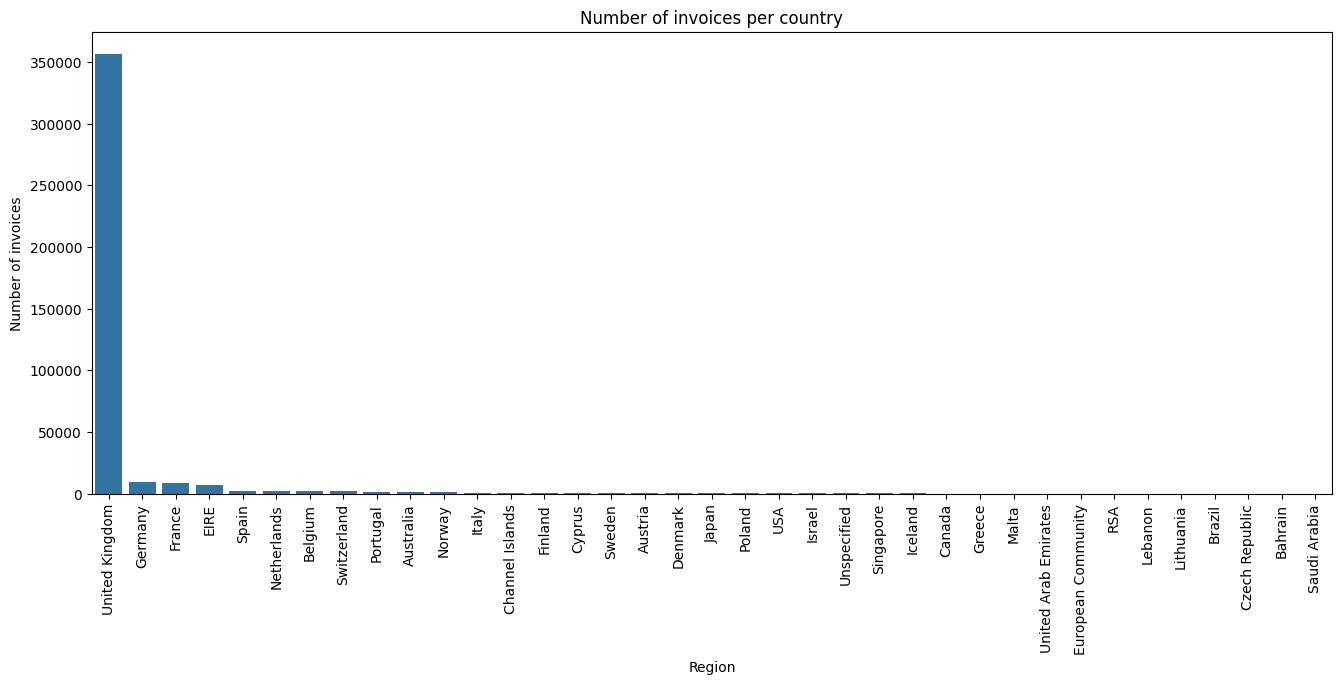

In [ ]:
df_grouped = df_clean.groupby('REGION')['INVOICE_NO'].count().reset_index(name='num_invoices')
total_facturas = df_clean['INVOICE_NO'].count()
df_grouped['porcentaje'] = (df_grouped['num_invoices'] / total_facturas) * 100
df_grouped = df_grouped.sort_values('porcentaje', ascending=False)

# Number of invoices per country
df_grouped = df_grouped.sort_values('num_invoices', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(data=df_grouped, x='REGION', y='num_invoices')
plt.title('Number of invoices per country')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Number of invoices')
plt.show()

In [ ]:
#Number and percentage of invoices by country
df_grouped.head(10).round(2)

,REGION,num_invoices,porcentaje
35,United Kingdom,356704,88.83
14,Germany,9478,2.36
13,France,8474,2.11
10,EIRE,7473,1.86
30,Spain,2527,0.63
23,Netherlands,2367,0.59
3,Belgium,2069,0.52
32,Switzerland,1876,0.47
26,Portugal,1471,0.37
0,Australia,1255,0.31


#### Total sales by REGION

<ipython-input-63-56ab38921747>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries['percentage_sales'] = (top_10_countries['UNIT_PRICE'] / total_sales) * 100
<ipython-input-63-56ab38921747>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries['average_sale'] = df_clean.groupby('REGION')['UNIT_PRICE'].mean()
<ipython-input-63-56ab38921747>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

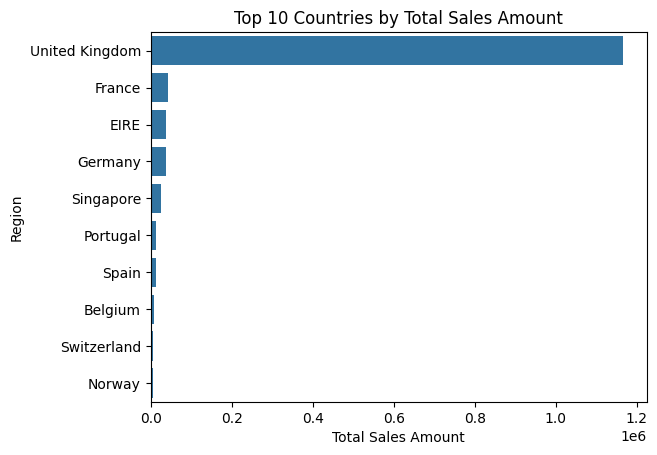

In [ ]:
ventas_pais = df_clean.pivot_table(index="REGION", values="UNIT_PRICE", aggfunc="sum")
ventas_pais_ordenado = ventas_pais.sort_values(by='UNIT_PRICE', ascending=False)
top_10_countries = ventas_pais_ordenado.head(10)
total_sales = df_clean['UNIT_PRICE'].sum()

# Calculate additional statistics (average, minimum, maximum)
top_10_countries['percentage_sales'] = (top_10_countries['UNIT_PRICE'] / total_sales) * 100
top_10_countries['average_sale'] = df_clean.groupby('REGION')['UNIT_PRICE'].mean()
top_10_countries['minimum_sale'] = df_clean.groupby('REGION')['UNIT_PRICE'].min()
top_10_countries['maximum_sale'] = df_clean.groupby('REGION')['UNIT_PRICE'].max()

# Total sales by REGION
sns.barplot(
    x="UNIT_PRICE",
    y="REGION",
    data=top_10_countries,
    orient='h'
)

plt.title('Top 10 Countries by Total Sales Amount')
plt.xlabel('Total Sales Amount')
plt.ylabel('Region')

plt.show()

In [ ]:
top_10_countries

,UNIT_PRICE,percentage_sales,average_sale,minimum_sale,maximum_sale
REGION,,,,,
United Kingdom,1165878.034,83.563634,3.268475,0.001,38970.00
France,42825.230,3.069474,5.053721,0.060,4161.06
EIRE,38209.260,2.738627,5.112975,0.040,1687.17
Germany,37633.440,2.697355,3.970610,0.040,599.50
Singapore,25108.890,1.799665,109.645808,0.190,3949.32
Portugal,12903.250,0.924833,8.771754,0.120,1241.98
Spain,12621.500,0.904639,4.994658,0.120,1715.85
Belgium,7540.130,0.540434,3.644335,0.120,39.95
Switzerland,6568.600,0.470801,3.501386,0.120,40.00


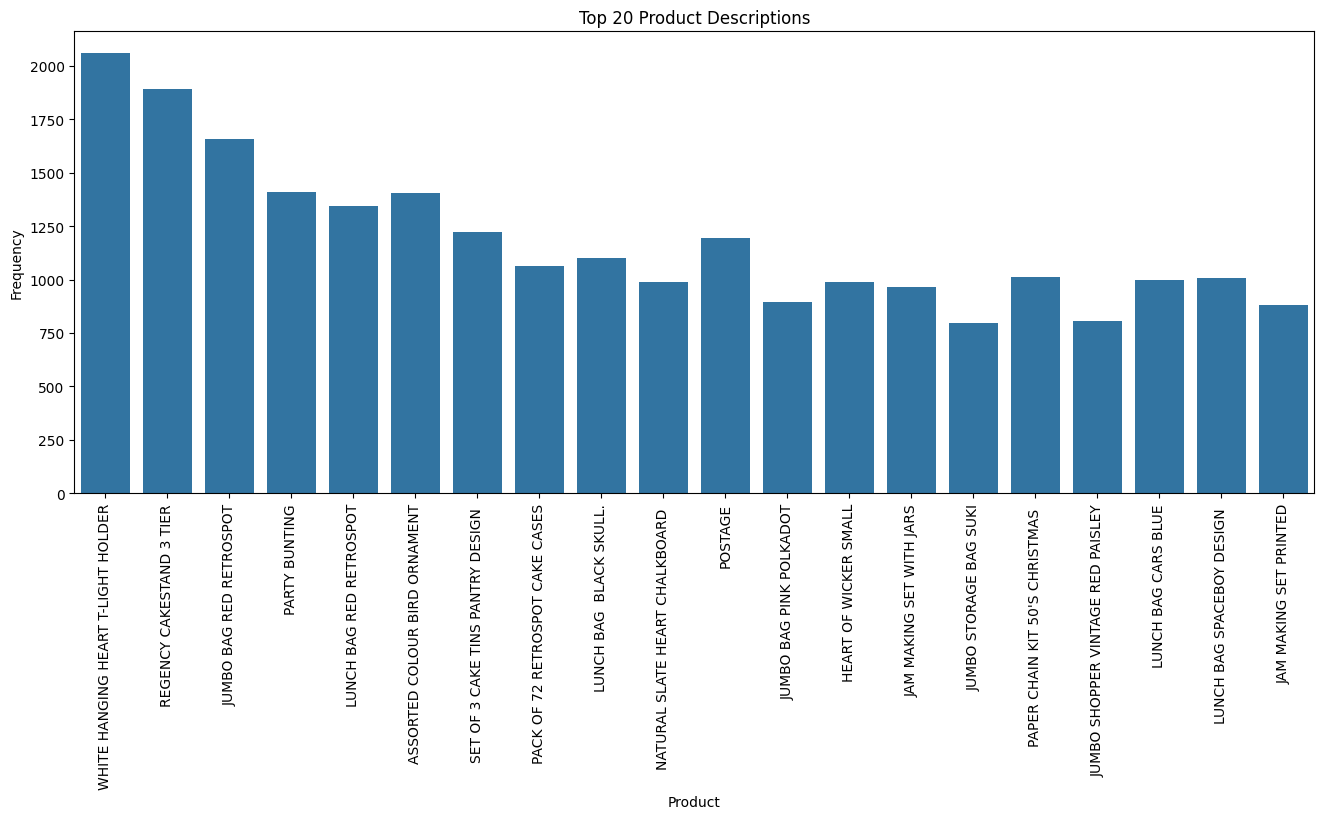

In [ ]:
# Bar graph Top 20 Products
plt.figure(figsize=(16, 6))
sns.countplot(data=df_clean, x='DESCRIPTION', order=df['DESCRIPTION'].value_counts().head(20).index)
plt.title('Top 20 Product Descriptions')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_clean['DESCRIPTION'].value_counts().head(10)

,count
DESCRIPTION,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1893
JUMBO BAG RED RETROSPOT,1659
PARTY BUNTING,1408
ASSORTED COLOUR BIRD ORNAMENT,1405
LUNCH BAG RED RETROSPOT,1345
SET OF 3 CAKE TINS PANTRY DESIGN,1224
POSTAGE,1196
LUNCH BAG BLACK SKULL.,1099


#### Invoices generated per month

In [ ]:
# transacciones de clientes sin contar cancelaciones
df_clean_WC = df_clean[~df_clean['INVOICE_NO'].str.startswith('C')]

<Axes: xlabel='INVOICE_DATE'>

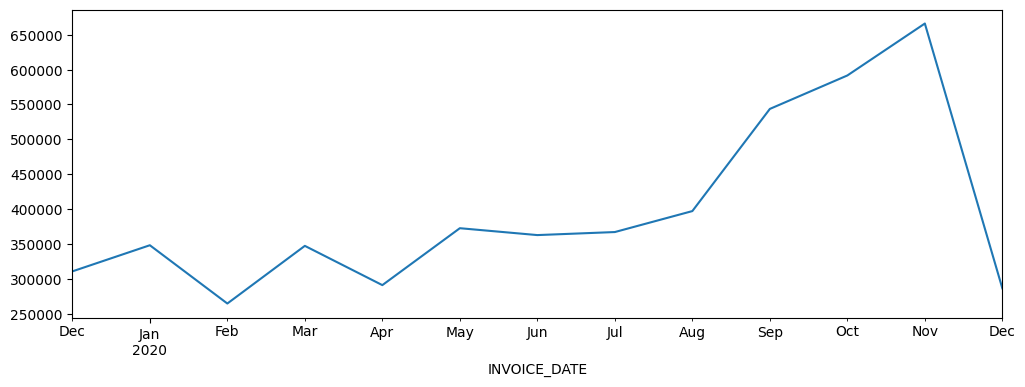

In [ ]:
# Cantidad de productos comprados a traves del tiempo
df_clean_WC.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum().plot(figsize=(12,4))

#### Number of UK vs foreign invoices per month

In [ ]:
df_clean['ES_UK'] = np.where(df_clean['REGION'] == 'United Kingdom', 'SI', 'NO')

In [ ]:
df_grouped_ = df_clean.groupby('ES_UK')['INVOICE_NO'].count().reset_index(name='num_invoices')
total_facturas_ = df_clean['INVOICE_NO'].count()
df_grouped_['percentage'] = (df_grouped_['num_invoices'] / total_facturas_) * 100
df_grouped_ = df_grouped_.sort_values('percentage', ascending=False)

# Number of invoices per country
df_grouped_ = df_grouped_.sort_values('num_invoices', ascending=False)

In [ ]:
df_grouped_

,ES_UK,num_invoices,percentage
1,SI,356704,88.82868
0,NO,44860,11.17132


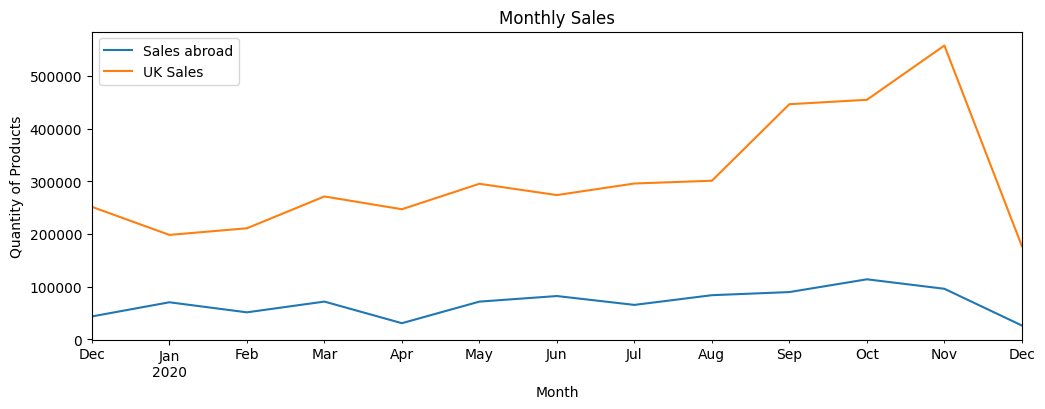

In [ ]:
# Filter UK vs other countries sales
df_clean_UK = df_clean[df_clean['ES_UK'] == 'SI']
ventas_no_UK = df_clean[df_clean['ES_UK'] == 'NO']

ventas_no_UK = ventas_no_UK.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum()
ventas_mensuales_UK = df_clean_UK.set_index('INVOICE_DATE')['QUANTITY'].resample('1m').sum()

ax = ventas_no_UK .plot(figsize=(12,4))
ventas_mensuales_UK.plot(ax=ax)

ax.legend(["Sales abroad", "UK Sales"]);
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Quantity of Products')
plt.show()

#### Number of new customers per month

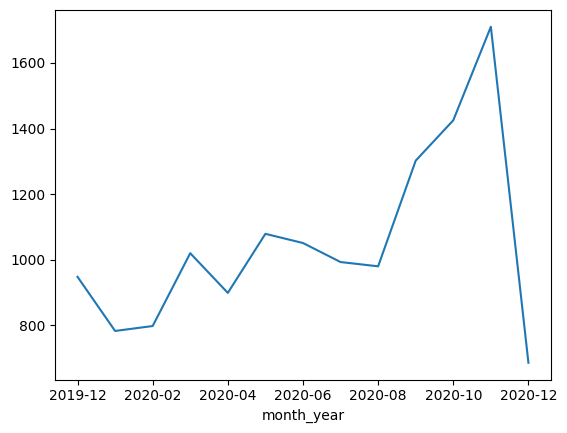

In [ ]:
unique_customers = df_clean.groupby('month_year')['CUSTOMER_ID'].nunique()
#total_facturas = df.groupby('month_year')['INVOICE_NO'].count()
unique_customers.plot()
plt.show()

In [ ]:
unique_customers

,CUSTOMER_ID
month_year,
2019-12,948
2020-01,783
2020-02,798
2020-03,1020
2020-04,899
2020-05,1079
2020-06,1051
2020-07,993
2020-08,980


### Population segmentation analysis

#### Users' behavior over time based on their location

In [ ]:
# Selecting required columns
df_selected = df_clean[['CUSTOMER_ID', 'INVOICE_DATE']]

# Grouping and obtaining the date of first purchase
df_first_date = df_selected.groupby('CUSTOMER_ID')['INVOICE_DATE'].min().reset_index(name='FIRST_DATE')

# Joining DataFrames
df_invoice_frecuence = df_selected.merge(df_first_date, on='CUSTOMER_ID')
df_invoice_frecuence['INVOICE_DATE'] = pd.to_datetime(df_invoice_frecuence['INVOICE_DATE'])
df_invoice_frecuence['FIRST_DATE'] = pd.to_datetime(df_invoice_frecuence['FIRST_DATE'])

# Calculating difference in months (vectorized)
df_invoice_frecuence['COHORT_FRECUENCE'] = ((df_invoice_frecuence['INVOICE_DATE'].dt.year - df_invoice_frecuence['FIRST_DATE'].dt.year) * 12 +
                                           df_invoice_frecuence['INVOICE_DATE'].dt.month - df_invoice_frecuence['FIRST_DATE'].dt.month).astype(int)

# Formatting date and creating pivot table
df_invoice_frecuence['FIRST_DATE'] = df_invoice_frecuence['FIRST_DATE'].dt.month
cohort_invoice = df_invoice_frecuence.groupby(['FIRST_DATE', 'COHORT_FRECUENCE'])['CUSTOMER_ID'].nunique().unstack().reset_index()

# Sort months
order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cohort_invoice['FIRST_DATE'] = pd.Categorical(cohort_invoice['FIRST_DATE'], categories=order, ordered=True)
cohort_invoice = cohort_invoice.sort_values(by='FIRST_DATE')
cohort_invoice = cohort_invoice[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

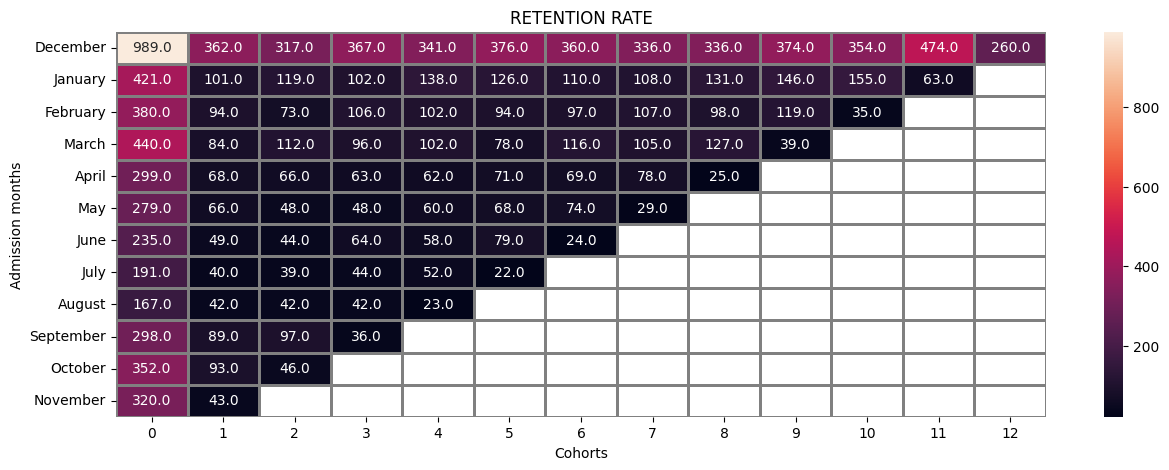

In [ ]:
# Heatmap for cohort
plt.figure(figsize=(15, 5))
plt.title('RETENTION RATE')
heatmap= sns.heatmap(cohort_invoice,
                     annot=True,
                     fmt='1',
                     linewidths=1,
                     linecolor='gray')

heatmap.set_xlabel('Cohorts')
heatmap.set_ylabel('Admission months')
index = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

#### Users' behaviour over time in the UK

In [ ]:
# Selecting required columns
df_uk = df_clean[df_clean['REGION'] == 'United Kingdom']

# Grouping by Customer ID and getting the date of first purchase
df_first_date_uk = df_uk.groupby('CUSTOMER_ID')['INVOICE_DATE'].min().reset_index(name='FIRST_DATE')

# Merging with original DataFrame
df_invoice_frecuence_uk = df_uk.merge(df_first_date_uk, on='CUSTOMER_ID')

# Converting dates to datetime
df_invoice_frecuence_uk['INVOICE_DATE'] = pd.to_datetime(df_invoice_frecuence_uk['INVOICE_DATE'])
df_invoice_frecuence_uk['FIRST_DATE'] = pd.to_datetime(df_invoice_frecuence_uk['FIRST_DATE'])

# Calculating cohort frequency using vectorized operations
df_invoice_frecuence_uk['COHORT_FRECUENCE'] = ((df_invoice_frecuence_uk['INVOICE_DATE'].dt.year - df_invoice_frecuence_uk['FIRST_DATE'].dt.year) * 12 +
                                               df_invoice_frecuence_uk['INVOICE_DATE'].dt.month - df_invoice_frecuence_uk['FIRST_DATE'].dt.month).astype(int)

# Extracting the month from the date of the first purchase
df_invoice_frecuence_uk['FIRST_DATE'] = df_invoice_frecuence_uk['FIRST_DATE'].dt.month

# Creating pivot table using groupby and unstack
cohort_invoice_uk = df_invoice_frecuence_uk.groupby(['FIRST_DATE', 'COHORT_FRECUENCE'])['CUSTOMER_ID'].nunique().unstack().reset_index()

# Sorting months and DataFrame
order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cohort_invoice_uk['FIRST_DATE'] = pd.Categorical(cohort_invoice_uk['FIRST_DATE'], categories=order, ordered=True)
cohort_invoice_uk = cohort_invoice_uk.sort_values(by='FIRST_DATE')
cohort_invoice_uk = cohort_invoice_uk[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

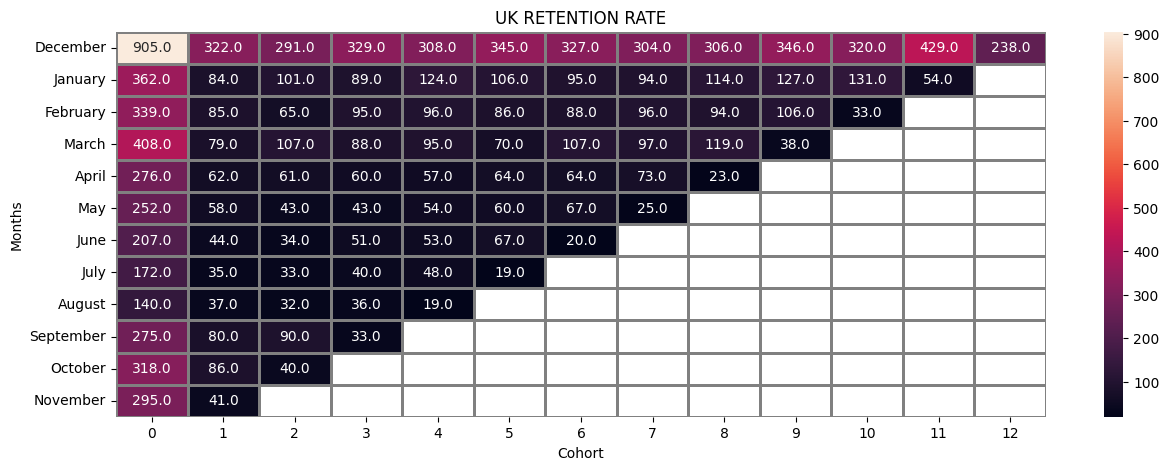

In [ ]:
# Heatmap for UK cohort
plt.figure(figsize=(15, 5))
plt.title('UK RETENTION RATE')

heatmap=sns.heatmap(cohort_invoice_uk,
                    annot=True,
                    fmt='1',
                    linewidths=1,
                    linecolor='gray')
heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Months')
index = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

#### Behavior over time of users in other countries

In [ ]:
# Filtering by all regions except UK
df_others = df_clean[df_clean['REGION'] != 'United Kingdom']

# Grouping by Customer ID and getting the date of first purchase
df_first_date_others = df_others.groupby('CUSTOMER_ID')['INVOICE_DATE'].min().reset_index(name='FIRST_DATE')

# Merging with original DataFrame
df_invoice_frecuence_others = df_others.merge(df_first_date_others, on='CUSTOMER_ID')

# Converting dates to datetime
df_invoice_frecuence_others['INVOICE_DATE'] = pd.to_datetime(df_invoice_frecuence_others['INVOICE_DATE'])
df_invoice_frecuence_others['FIRST_DATE'] = pd.to_datetime(df_invoice_frecuence_others['FIRST_DATE'])

# Calculating cohort frequency using vectorized operations
df_invoice_frecuence_others['COHORT_FRECUENCE'] = ((df_invoice_frecuence_others['INVOICE_DATE'].dt.year - df_invoice_frecuence_others['FIRST_DATE'].dt.year) * 12 +
                                                  df_invoice_frecuence_others['INVOICE_DATE'].dt.month - df_invoice_frecuence_others['FIRST_DATE'].dt.month).astype(int)

# Extracting month from first purchase date
df_invoice_frecuence_others['FIRST_DATE'] = df_invoice_frecuence_others['FIRST_DATE'].dt.month

# Creating pivot table using groupby and unstack
cohort_invoice_others = df_invoice_frecuence_others.groupby(['FIRST_DATE', 'COHORT_FRECUENCE'])['CUSTOMER_ID'].nunique().unstack().reset_index()

# Sorting months and DataFrame
order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cohort_invoice_others['FIRST_DATE'] = pd.Categorical(cohort_invoice_others['FIRST_DATE'], categories=order, ordered=True)
cohort_invoice_others = cohort_invoice_others.sort_values(by='FIRST_DATE')
cohort_invoice_others = cohort_invoice_others[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

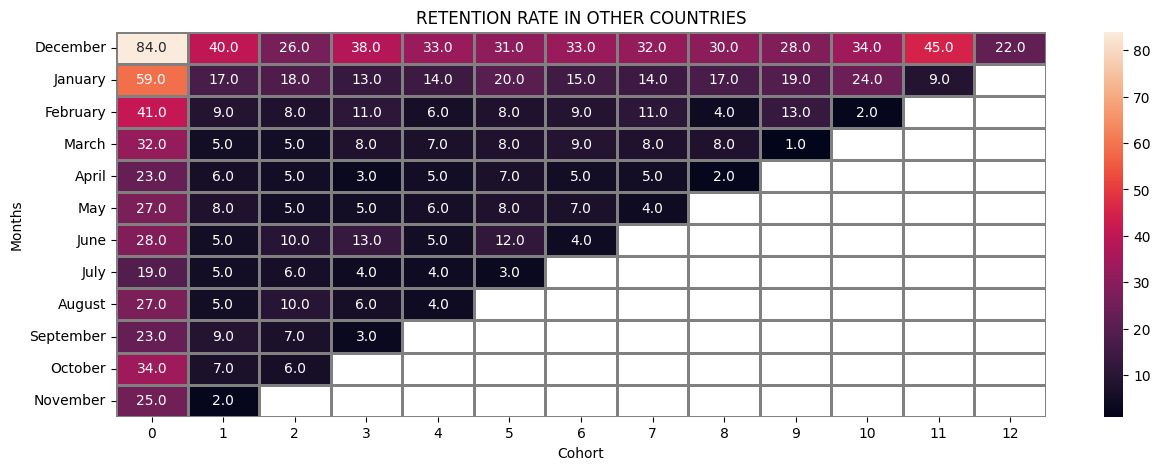

In [ ]:
# Heatmap for cohort
plt.figure(figsize=(15, 5))
plt.title('RETENTION RATE IN OTHER COUNTRIES')

heatmap=sns.heatmap(cohort_invoice_others,
                    annot=True,
                    fmt='1',
                    linewidths=1,
                    linecolor='gray')
heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Months')
index = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

#### Quantity of products ordered over time

In [ ]:
# Grouping by stock code and getting the date of first purchase
df_stock_code_first_date = df_clean.groupby('STOCK_CODE')['INVOICE_DATE'].min().reset_index(name='FIRST_DATE')

# Merging with the original DataFrame
df_stock_code = df.merge(df_stock_code_first_date, on='STOCK_CODE')

# Converting dates to datetime
df_stock_code['INVOICE_DATE'] = pd.to_datetime(df_stock_code['INVOICE_DATE'])
df_stock_code['FIRST_DATE'] = pd.to_datetime(df_stock_code['FIRST_DATE'])

# Calculating cohort frequency using operations vectorized
df_stock_code['COHORT_FRECUENCE'] = ((df_stock_code['INVOICE_DATE'].dt.year - df_stock_code['FIRST_DATE'].dt.year) * 12 +
                                      df_stock_code['INVOICE_DATE'].dt.month - df_stock_code['FIRST_DATE'].dt.month).astype(int)

# Extracting month from the date of the first purchase
df_stock_code['FIRST_DATE'] = df_stock_code['FIRST_DATE'].dt.month

# Creating dynamic table using groupby and unstack
cohort_stock_code = df_stock_code.groupby(['FIRST_DATE', 'COHORT_FRECUENCE'])['STOCK_CODE'].nunique().unstack().reset_index()

# Sorting months and DataFrame
order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cohort_stock_code['FIRST_DATE'] = pd.Categorical(cohort_stock_code['FIRST_DATE'], categories=order, ordered=True)
cohort_stock_code = cohort_stock_code.sort_values(by='FIRST_DATE')
cohort_stock_code = cohort_stock_code[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

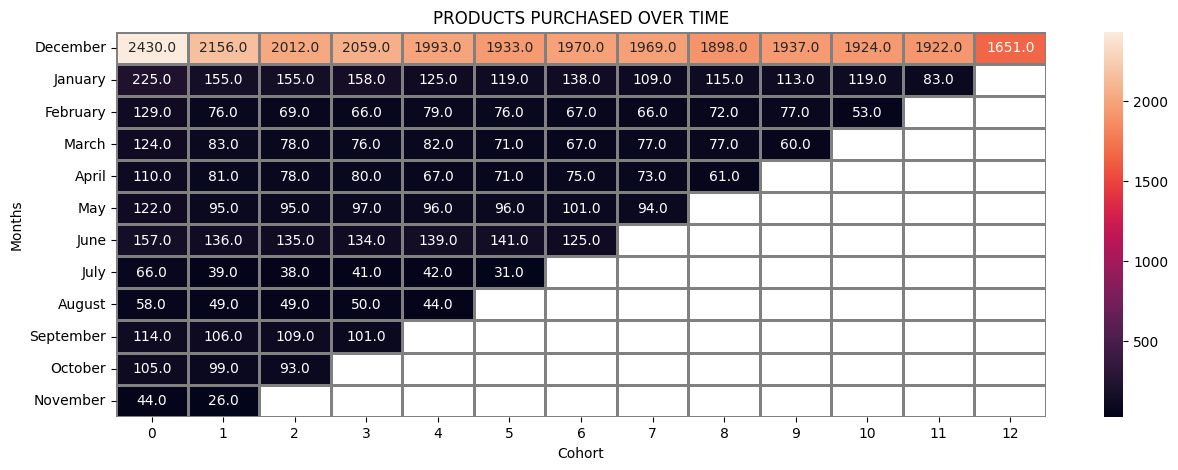

In [ ]:
# Heatmap for cohort
plt.figure(figsize=(15, 5))
plt.title('PRODUCTS PURCHASED OVER TIME')

heatmap=sns.heatmap(cohort_stock_code,
            annot=True,
            fmt='1',
            linewidths=1,
            linecolor='gray')
heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Months')
index = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

#### Quantity of products ordered in the United Kingdom

In [ ]:
# Filtering by UK data
df_uk = df_clean[df_clean['REGION'] == 'United Kingdom']

# Grouping by stock code and getting the date of first purchase
df_stock_code_first_date_uk = df_uk.groupby('STOCK_CODE')['INVOICE_DATE'].min().reset_index(name='FIRST_DATE')

# Merging with original DataFrame
df_stock_code_uk = df_uk.merge(df_stock_code_first_date_uk, on='STOCK_CODE')

# Converting dates to datetime
df_stock_code_uk['INVOICE_DATE'] = pd.to_datetime(df_stock_code_uk['INVOICE_DATE'])
df_stock_code_uk['FIRST_DATE'] = pd.to_datetime(df_stock_code_uk['FIRST_DATE'])

# Calculating cohort frequency using operations
df_stock_code_uk['COHORT_FRECUENCE'] = ((df_stock_code_uk['INVOICE_DATE'].dt.year - df_stock_code_uk['FIRST_DATE'].dt.year) * 12 +
                                        df_stock_code_uk['INVOICE_DATE'].dt.month - df_stock_code_uk['FIRST_DATE'].dt.month).astype(int)

# Extracting month from date of first purchase
df_stock_code_uk['FIRST_DATE'] = df_stock_code_uk['FIRST_DATE'].dt.month

# Creating a pivot table using groupby and unstack
cohort_stock_code_uk = df_stock_code_uk.groupby(['FIRST_DATE', 'COHORT_FRECUENCE'])['STOCK_CODE'].nunique().unstack().reset_index()

# Sorting months and sorting DataFrame
order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cohort_stock_code_uk['FIRST_DATE'] = pd.Categorical(cohort_stock_code_uk['FIRST_DATE'], categories=order, ordered=True)
cohort_stock_code_uk = cohort_stock_code_uk.sort_values(by='FIRST_DATE')
cohort_stock_code_uk = cohort_stock_code_uk[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

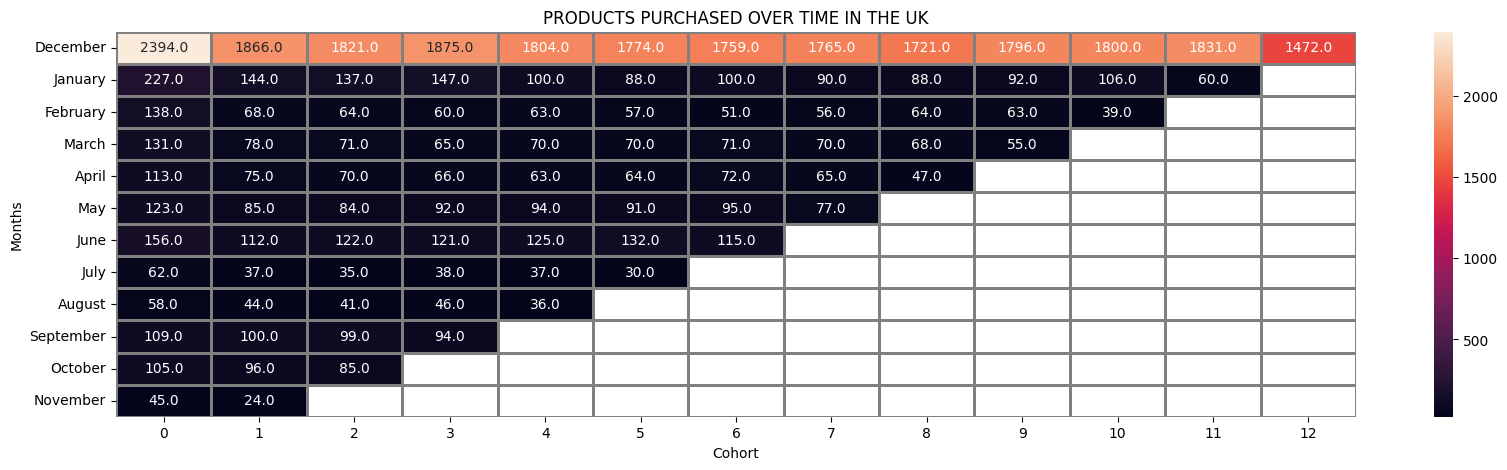

In [ ]:
# Heatmap for cohort
plt.figure(figsize=(20, 5))
plt.title('PRODUCTS PURCHASED OVER TIME IN THE UK')

heatmap=sns.heatmap(cohort_stock_code_uk,
            annot=True,
            fmt='1',
            linewidths=1,
            linecolor='gray')
heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Months')
index = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

#### Quantity of products ordered in other countries

In [ ]:
# Filtering by regions other than UK
df_others = df_clean[df_clean['REGION'] != 'United Kingdom']

# Grouping by stock code and getting date of first purchase
df_stock_code_first_date_others = df_others.groupby('STOCK_CODE')['INVOICE_DATE'].min().reset_index(name='FIRST_DATE')

# Merging with original DataFrame
df_stock_code_others = df_others.merge(df_stock_code_first_date_others, on='STOCK_CODE')

# Converting dates to datetime
df_stock_code_others['INVOICE_DATE'] = pd.to_datetime(df_stock_code_others['INVOICE_DATE'])
df_stock_code_others['FIRST_DATE'] = pd.to_datetime(df_stock_code_others['FIRST_DATE'])

# Calculating cohort frequency using vectorized operations
df_stock_code_others['COHORT_FRECUENCE'] = ((df_stock_code_others['INVOICE_DATE'].dt.year - df_stock_code_others['FIRST_DATE'].dt.year) * 12 +
                                           df_stock_code_others['INVOICE_DATE'].dt.month - df_stock_code_others['FIRST_DATE'].dt.month).astype(int)

# Extracting month of first purchase date
df_stock_code_others['FIRST_DATE'] = df_stock_code_others['FIRST_DATE'].dt.month

# Creating pivot table using groupby and unstack
cohort_stock_code_others = df_stock_code_others.groupby(['FIRST_DATE', 'COHORT_FRECUENCE'])['STOCK_CODE'].nunique().unstack().reset_index()

# Sorting months and sorting DataFrame
order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
cohort_stock_code_others['FIRST_DATE'] = pd.Categorical(cohort_stock_code_others['FIRST_DATE'], categories=order, ordered=True)
cohort_stock_code_others = cohort_stock_code_others.sort_values(by='FIRST_DATE')
cohort_stock_code_others = cohort_stock_code_others[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

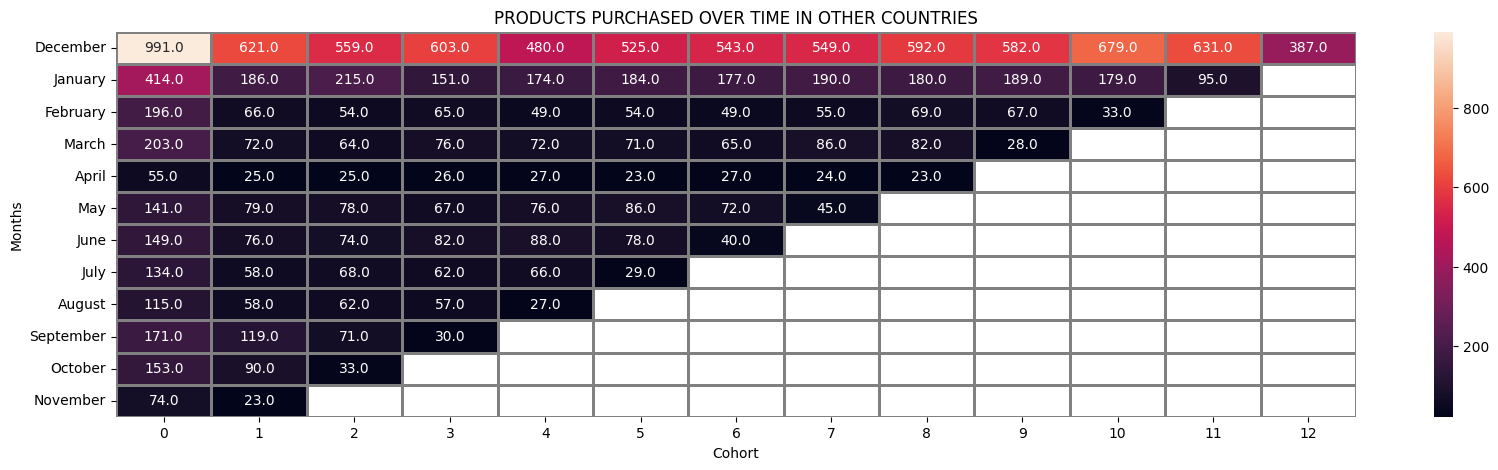

In [ ]:
# Heatmap for cohort
plt.figure(figsize=(20, 5))
plt.title('PRODUCTS PURCHASED OVER TIME IN OTHER COUNTRIES')
heatmap=sns.heatmap(cohort_stock_code_others,
            annot=True,
            fmt='1',
            linewidths=1,
            linecolor='gray')

heatmap.set_xlabel('Cohort')
heatmap.set_ylabel('Months')
index = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
heatmap.set_yticklabels(index, rotation=0)
plt.show()

## RFM Metrics Calculation

- Recency: Difference between the last purchase date and the current date.
- Frequency: Number of purchases a customer has made.
- Monetary: Total amount spent by the customer.

We start by calculating AMOUNT, which is the total value that the customer spent per product and we include its value in the dataframe

In [ ]:
df_clean['AMOUNT'] = df_clean['QUANTITY']*df_clean['UNIT_PRICE']
rfm_m = df_clean.groupby('CUSTOMER_ID')['AMOUNT'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CUSTOMER_ID,AMOUNT
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [ ]:
df_clean

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers,ES_UK,AMOUNT
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,2019-12,True,SI,15.30
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,2019-12,True,SI,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,2019-12,True,SI,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,2019-12,True,SI,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,2019-12,True,SI,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2020-12-09 12:50:00,0.85,12680,France,2020-12,True,NO,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2020-12-09 12:50:00,2.10,12680,France,2020-12,True,NO,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2020-12-09 12:50:00,4.15,12680,France,2020-12,True,NO,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2020-12-09 12:50:00,4.15,12680,France,2020-12,True,NO,16.60


Customers whose customer ID contained C (purchase invoices with cancellations) were extracted

In [ ]:
df_clean = df_clean[~df_clean["INVOICE_NO"].str.contains("C")]
df_clean[df_clean["AMOUNT"] == 0.0].shape
df_clean = df_clean[df_clean["AMOUNT"] != 0.0]

df_clean["INVOICE_DATE"].max()

analysis_date = dt.datetime(2021,12, 10)

# RFM metrics

df_rfm = df_clean.groupby("CUSTOMER_ID").agg({"QUANTITY": lambda x : x.sum(),
                               "AMOUNT": lambda x : x.sum(),
                               "INVOICE_NO": "count",
                               "INVOICE_DATE" : lambda x: (analysis_date - x.max()).days})
df_rfm.head()

,QUANTITY,AMOUNT,INVOICE_NO,INVOICE_DATE
CUSTOMER_ID,,,,
12346,74215,77183.60,1,691
12347,2458,4310.00,182,367
12348,2341,1797.24,31,440
12349,631,1757.55,73,383
12350,197,334.40,17,676


The RFM MONETARY, FREQUENCY, and RECENCY metrics were created

In [ ]:
rfm = df_rfm
rfm.columns = ["QUANTITY","MONETARY","FRECUENCY","RECENCY"]

# Customers who have made more than one purchase
rfm= rfm[rfm["FRECUENCY"] > 1 ]
rfm.head()

,QUANTITY,MONETARY,FRECUENCY,RECENCY
CUSTOMER_ID,,,,
12347,2458,4310.00,182,367
12348,2341,1797.24,31,440
12349,631,1757.55,73,383
12350,197,334.40,17,676
12352,536,2506.04,85,401


We divide each metric into five levels as it allows us to identify high-value customers, inactive customers, and opportunities for improvement in the customer experience; we also create a single RFM score by adding RECENCY_SCORE and FRECUENCY_SCORE.

In [ ]:
# Calculating the score of RFM
rfm["RECENCY_SCORE"]= pd.qcut(rfm["RECENCY"], 5, labels = [5, 4, 3, 2, 1])
rfm["FRECUENCY_SCORE"]= pd.qcut(rfm["FRECUENCY"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["MONETARY_SCORE"]= pd.qcut(rfm["MONETARY"], 5, labels = [1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm['RECENCY_SCORE'].astype(str) + rfm['FRECUENCY_SCORE'].astype(str))
rfm.head()

<ipython-input-91-1573f71c9d3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["RECENCY_SCORE"]= pd.qcut(rfm["RECENCY"], 5, labels = [5, 4, 3, 2, 1])
<ipython-input-91-1573f71c9d3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["FRECUENCY_SCORE"]= pd.qcut(rfm["FRECUENCY"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
<ipython-input-91-1573f71c9d3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,QUANTITY,MONETARY,FRECUENCY,RECENCY,RECENCY_SCORE,FRECUENCY_SCORE,MONETARY_SCORE,RFM_SCORE
CUSTOMER_ID,,,,,,,,
12347,2458,4310.00,182,367,5,5,5,55
12348,2341,1797.24,31,440,2,3,4,23
12349,631,1757.55,73,383,4,4,4,44
12350,197,334.40,17,676,1,2,2,12
12352,536,2506.04,85,401,3,4,5,34


We classify customers according to the RFM score obtained

In [ ]:
# Creating and analyzing RFM segments

seg_map = {
r'[1-2][1-2]': 'inactive_customers',
r'[1-2][3-4]': 'customers_to_recover',
r'[1-2]5': 'valuable_customers_at_risk',
r'3[1-2]': 'potential_customers',
r'33': 'customers_to_retain',
r'[3-4][4-5]': 'loyal_and_recent_customers',
r'41': 'new_prospects_customers',
r'51': 'new_valuable_customers',
r'[4-5][2-3]': 'loyal_but_less_active',
r'5[4-5]': 'loyal_and_active'
}

rfm["SEGMENT"]= rfm["RFM_SCORE"].replace(seg_map, regex=True)

rfm.head()

<ipython-input-92-396510bcc899>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["SEGMENT"]= rfm["RFM_SCORE"].replace(seg_map, regex=True)


,QUANTITY,MONETARY,FRECUENCY,RECENCY,RECENCY_SCORE,FRECUENCY_SCORE,MONETARY_SCORE,RFM_SCORE,SEGMENT
CUSTOMER_ID,,,,,,,,,
12347,2458,4310.00,182,367,5,5,5,55,loyal_and_active
12348,2341,1797.24,31,440,2,3,4,23,customers_to_recover
12349,631,1757.55,73,383,4,4,4,44,loyal_and_recent_customers
12350,197,334.40,17,676,1,2,2,12,inactive_customers
12352,536,2506.04,85,401,3,4,5,34,loyal_and_recent_customers


In [ ]:
rfm[["SEGMENT", "RECENCY", "FRECUENCY", "MONETARY"]].groupby("SEGMENT").agg(["mean", "count"])

RECENCY         FRECUENCY           MONETARY  \
                                  mean count        mean count         mean   
SEGMENT                                                                       
customers_to_recover        526.212544   574   57.170732   574  1014.931254   
customers_to_retain         415.701571   191   41.738220   191   822.890209   
inactive_customers          570.923445  1045   14.504306  1045   475.577868   
loyal_and_active            370.388704   602  286.543189   602  6986.557409   
loyal_and_recent_customers  397.924224   805  155.975155   805  2862.959168   
loyal_but_less_active       380.645291   499   34.975952   499   911.946535   
new_prospects_customers     387.537736   106    8.141509   106   444.749434   
new_valuable_customers      371.481481    54    7.944444    54  3742.532037   
potential_customers         416.339806   309   16.385113   309   461.450939   
valuable_customers_at_risk  508.939024    82  180.597561    82  2378.666720   

                                  
                           count  
SEGMENT                           
customers_to_recover         574  
customers_to_retain          191  
inactive_customers          1045  
loyal_and_active             602  
loyal_and_recent_customers   805  
loyal_but_less_active        499  
new_prospects_customers      106  
new_valuable_customers        54  
potential_customers          309  
valuable_customers_at_risk    82

In [ ]:
rfm= rfm.reset_index()
loyal_and_active_segments_customer = rfm[rfm["SEGMENT"].isin(["loyal_and_active"])]["CUSTOMER_ID"]

custumors_loyal_and_active = df_clean[(df_clean["CUSTOMER_ID"].isin(loyal_and_active_segments_customer))]

custumors_loyal_and_active.head(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers,ES_UK,AMOUNT
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2019-12-01 08:45:00,3.75,12583,France,2019-12,True,NO,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2019-12-01 08:45:00,3.75,12583,France,2019-12,True,NO,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2019-12-01 08:45:00,3.75,12583,France,2019-12,True,NO,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2019-12-01 08:45:00,0.85,12583,France,2019-12,True,NO,10.2
30,536370,21883,STARS GIFT TAPE,24,2019-12-01 08:45:00,0.65,12583,France,2019-12,True,NO,15.6
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2019-12-01 08:45:00,0.85,12583,France,2019-12,True,NO,40.8
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2019-12-01 08:45:00,1.25,12583,France,2019-12,True,NO,30.0
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2019-12-01 08:45:00,2.95,12583,France,2019-12,True,NO,53.1
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2019-12-01 08:45:00,2.95,12583,France,2019-12,True,NO,70.8
35,536370,22629,SPACEBOY LUNCH BOX,24,2019-12-01 08:45:00,1.95,12583,France,2019-12,True,NO,46.8


In [ ]:
df_rfm

,QUANTITY,MONETARY,FRECUENCY,RECENCY
CUSTOMER_ID,,,,
12346,74215,77183.60,1,691
12347,2458,4310.00,182,367
12348,2341,1797.24,31,440
12349,631,1757.55,73,383
12350,197,334.40,17,676
...,...,...,...,...
18280,45,180.60,10,642
18281,54,80.82,7,545
18282,103,178.05,12,372


In [ ]:
df_clean

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION,month_year,registered_customers,ES_UK,AMOUNT
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,2019-12,True,SI,15.30
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,2019-12,True,SI,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,2019-12,True,SI,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,2019-12,True,SI,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,2019-12,True,SI,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2020-12-09 12:50:00,0.85,12680,France,2020-12,True,NO,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2020-12-09 12:50:00,2.10,12680,France,2020-12,True,NO,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2020-12-09 12:50:00,4.15,12680,France,2020-12,True,NO,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2020-12-09 12:50:00,4.15,12680,France,2020-12,True,NO,16.60


Text(0.5, 0, 'Attributes')

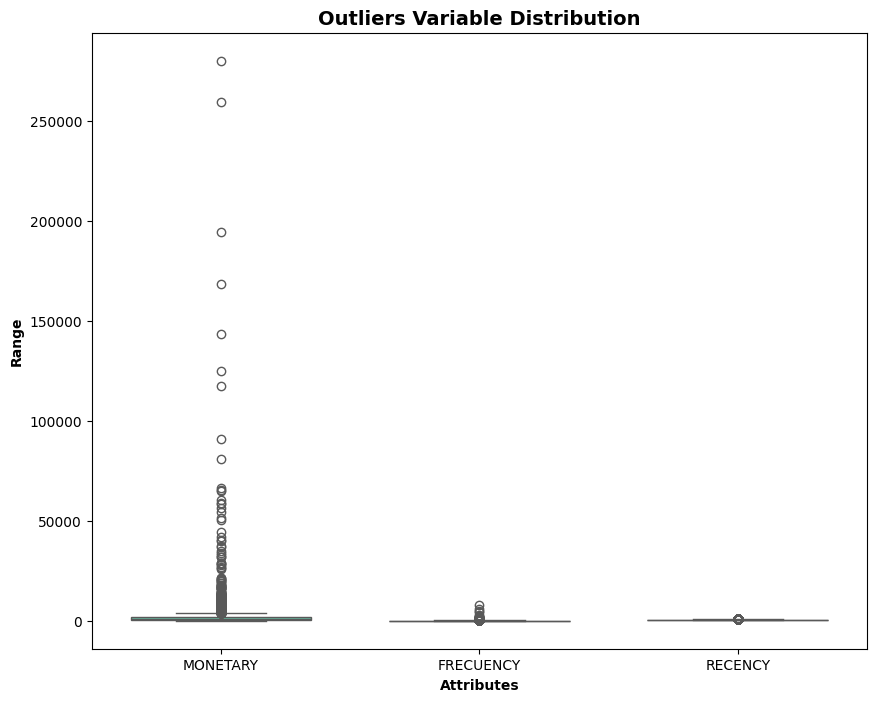

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
sns.boxplot(data=rfm[['MONETARY', 'FRECUENCY', 'RECENCY']], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')

Since we can see values ​​in MONETARY that are out of the ordinary (Outliers) we decided to use the IQR technique to eliminate them.

In [ ]:
# Removing (statistical) outliers for MONETARY
Q1 = rfm.MONETARY.quantile(0.05)
Q3 = rfm.MONETARY.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.MONETARY >= Q1 - 1.5*IQR) & (rfm.MONETARY <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for FRECUENCY
Q1 = rfm.FRECUENCY.quantile(0.05)
Q3 = rfm.FRECUENCY.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.FRECUENCY >= Q1 - 1.5*IQR) & (rfm.FRECUENCY <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for RECENCY
Q1 = rfm.RECENCY.quantile(0.05)
Q3 = rfm.RECENCY.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.RECENCY >= Q1 - 1.5*IQR) & (rfm.RECENCY<= Q3 + 1.5*IQR)]

In [ ]:
# Rescaling the attributes

rfm_df = rfm[['MONETARY', 'FRECUENCY', 'RECENCY']]

# Declare
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4188, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['MONETARY', 'FRECUENCY', 'RECENCY']
rfm_df_scaled.head()

,MONETARY,FRECUENCY,RECENCY
0,1.631581,1.066320,-0.905844
1,0.253410,-0.467687,-0.169206
2,0.231641,-0.041009,-0.744389
3,-0.548912,-0.609912,2.212253
4,0.642165,0.080898,-0.562752


## Building the Model

### K-MEANS

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=4)

In [ ]:
kmeans.labels_

array([3, 2, 2, ..., 2, 1, 2], dtype=int32)

### Metodo del Codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

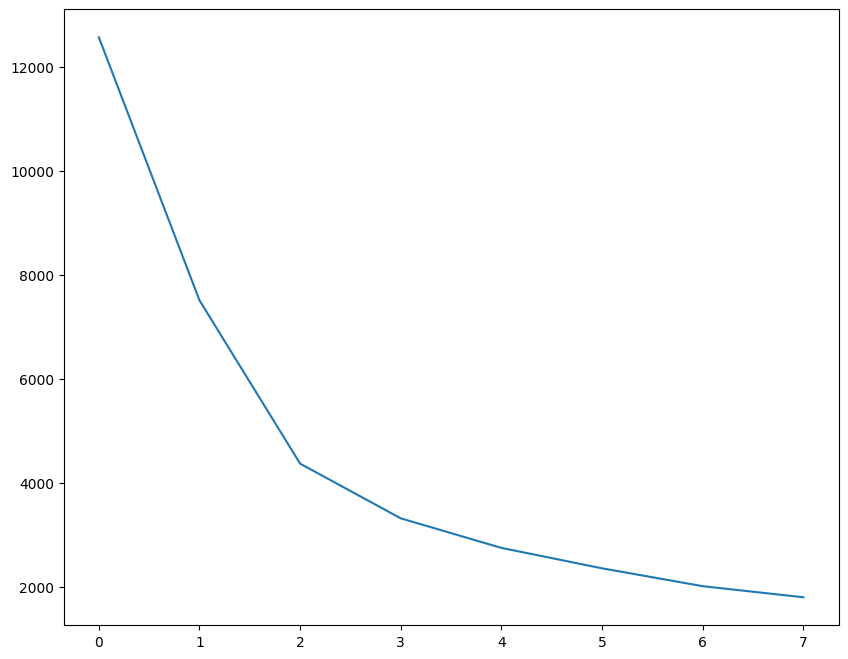

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

This elbow plot shows inertia (WCSS) as a function of the number of clusters (k) in a clustering analysis. The "elbow" of the plot, located around k=3 (0-4), indicates that this is the optimal number of clusters. From this point on, the reduction in inertia is minor, suggesting that adding more clusters does not significantly improve cluster compaction.

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=2, the silhouette score is 0.540230372992275


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=3, the silhouette score is 0.5108377320912139


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=4, the silhouette score is 0.4804929631810638


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=5, the silhouette score is 0.46918224782143203


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=6, the silhouette score is 0.41823306351313644


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=7, the silhouette score is 0.4153525083199637


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=8, the silhouette score is 0.4015808455279381


In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=3)

In [ ]:
 kmeans.labels_

array([2, 0, 0, ..., 0, 2, 0], dtype=int32)

In [ ]:
# assign the label
rfm['CLUSTER_ID'] = kmeans.labels_
rfm.head()

,CUSTOMER_ID,QUANTITY,MONETARY,FRECUENCY,RECENCY,RECENCY_SCORE,FRECUENCY_SCORE,MONETARY_SCORE,RFM_SCORE,SEGMENT,Cluster_Id
0,12347,2458,4310.00,182,367,5,5,5,55,loyal_and_active,2
1,12348,2341,1797.24,31,440,2,3,4,23,customers_to_recover,0
2,12349,631,1757.55,73,383,4,4,4,44,loyal_and_recent_customers,0
3,12350,197,334.40,17,676,1,2,2,12,inactive_customers,1
4,12352,536,2506.04,85,401,3,4,5,34,loyal_and_recent_customers,0


<Axes: xlabel='Cluster_Id', ylabel='MONETARY'>

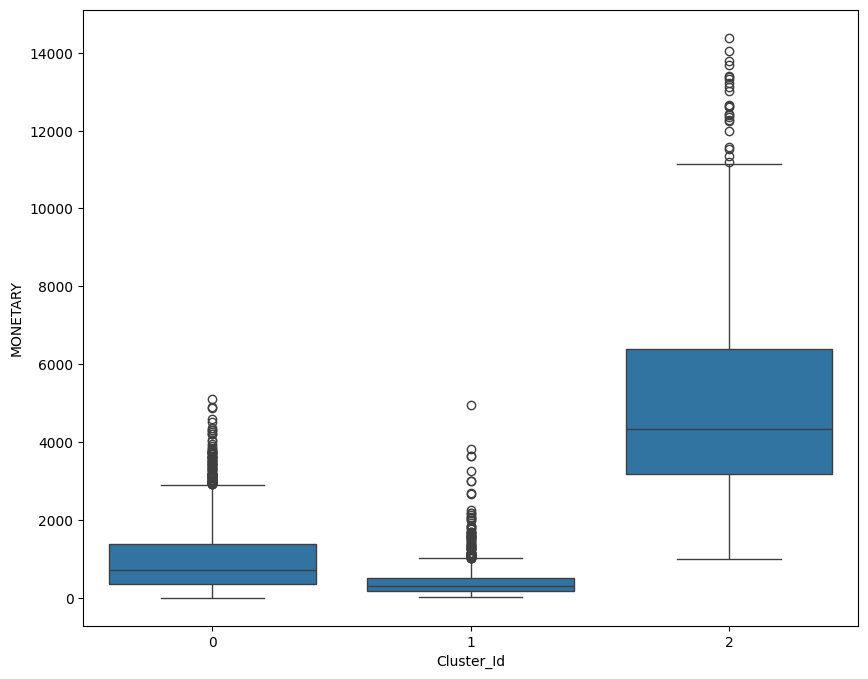

In [ ]:
# Box plot to visualize Cluster Id vs Monetary

sns.boxplot(x='CLUSTER_ID', y='MONETARY', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='FRECUENCY'>

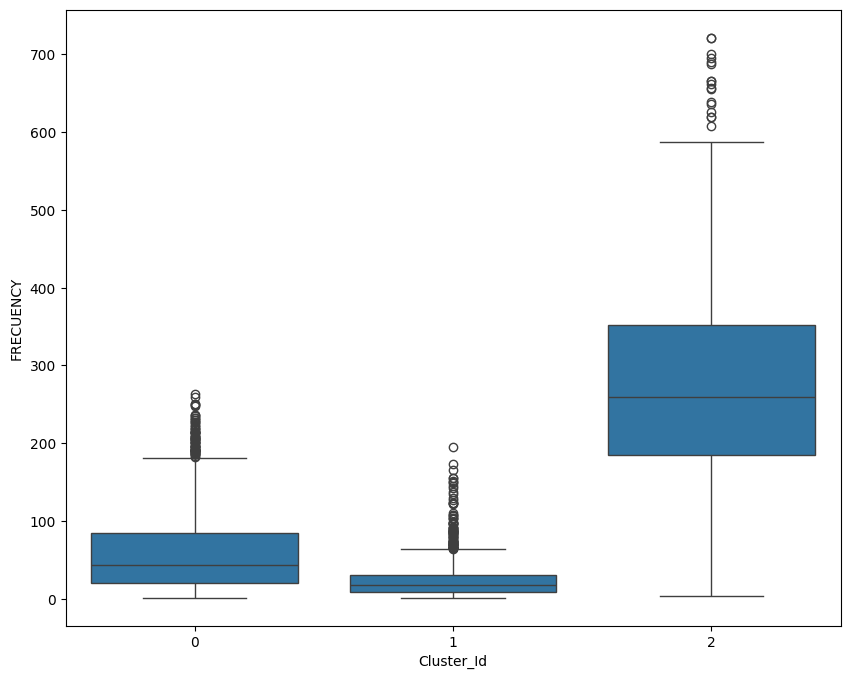

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='CLUSTER_ID', y='FRECUENCY', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='RECENCY'>

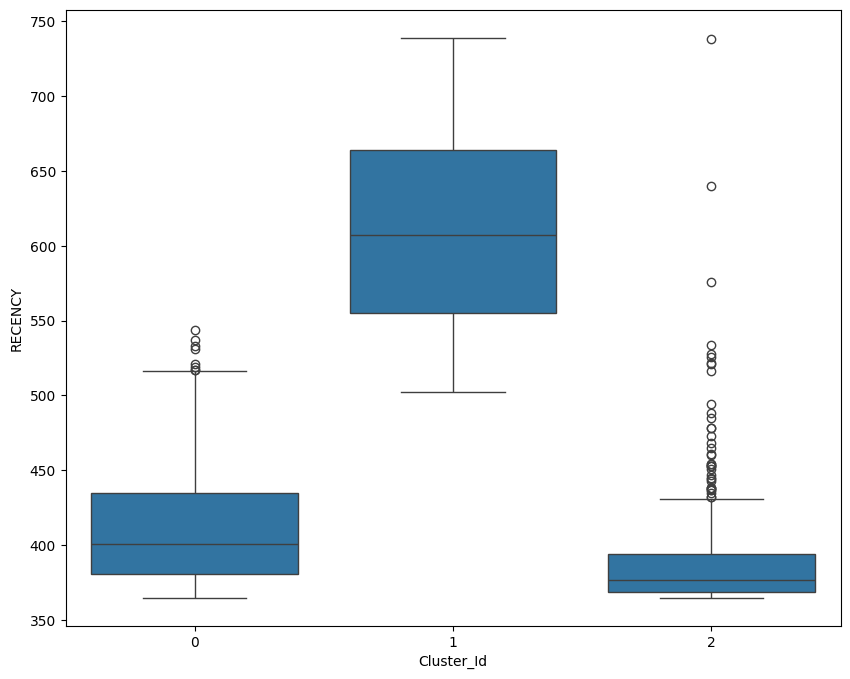

In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='CLUSTER_ID', y='RECENCY', data=rfm)

**RFM Cluster Charts Summary**

**Recency:** We see that we have more customers who make purchases at longer time intervals.

**Frequency:** We see a higher representation of customers who have made more purchases in the store compared to those who buy infrequently.

**Monetary:** We notice a higher concentration of customers whose purchases tend to be more expensive, followed by those with medium spending and, thirdly, customers with low spending.


**Therefore we could conclude:**

**Recency:** There is a distribution where most customers make purchases at longer time intervals, which may imply different reactivation or engagement strategies depending on the purchase frequency of each group.

**Frequency:** There is a clear difference between frequent customers, who make multiple purchases, and those who are less frequent. This suggests opportunities to segment and personalize marketing and loyalty strategies according to the level of purchase activity of each segment.

**Monetary:** A distribution is observed where some customers make high-value purchases, followed by customers with medium spending and, thirdly, customers with low spending. This finding can influence upselling, cross-selling and customer segmentation strategies based on the value of their purchases.

## Conclusions

The purpose of this project was to understand the purchasing behavior of the retail company's customers. Therefore, we began by defining the objectives to be achieved, which were to segment the customers based on the RFM methodology, analyze them using Clustering techniques, and identify the factors that influence the purchasing behavior of each customer segment.

We began by exploring the data, where we learned the columns, rows, and dtype of the DataFrame, with eight columns and 541,909 rows. With 24% missing values ​​in CUSTOMER_ID and 0.3% in DESCRIPTION; and 0.1% of duplicate values. The data type of the INVOICE_DATE column was adjusted to datetime.

Then, the data was explored where UNIT_PRICE showed a high concentration of unit prices very close to zero and QUANTITY where negative values ​​were evident. It was also found that the region with the highest sales is the United Kingdom with 91% of total sales; the best-selling products were July, August and September, the months where most products are sold. Finally, it was observed that 75% of customers are registered customers and regarding sales, 56% are from registered users, and 44% of sales are from non-registered users, with a difference of 316,836 USD

The values ​​were then studied without outliers, and in the DataFrame atypical_prices, the QUANTITY column has negative values ​​that do not represent typical sales, but rather additional charges or financial adjustments. And in atypical_prices_descriptions these descriptions are verified in detail to make informed decisions on how to handle them. Two values ​​less than zero were found in the UNIT_PRICE column, referring to Delinquency Adjustment, with NaN in CUSTOMER_ID.

Once we have decided which values ​​are useful and which are not, we proceed to clean the Dataset in order to perform an EDA that provides more information. Duplicate values, unregistered customers and sales with a value of zero were eliminated. It was also evident that there were products whose INVOICE_NO begins with C because the transaction was cancelled and/or the products were returned, which causes negative amounts.

It was evident that the increase in the number of products sold over time began from September to November, but in December a decline was evident. and cancelled or returned products increased in the months of December-January. The country with the highest turnover was the United Kingdom with 356,704, which is 88.83% of the total.

Finally, we calculated the RFM metrics, where we divided each metric into five levels since it allows us to identify high-value customers, inactive customers and opportunities for improvement in the customer experience; We also created a single RFM score by adding RECENCY_SCORE and FREQUENCY_SCORE. And we classified the customers according to the RFM score obtained in inactive customers, customers to recover, valuable customers at risk, potential customers, customers to retain, loyal and recent customers, new prospective customers, valuable new customers, loyal but less active and loyal and active customers.

And to apply the elbow method, we checked if there are outliers and we found that MONETARY has outlier values, which we decided to use the IQR technique to eliminate them. We applied StandardScaler to standardize the data and improve the performance of the model. We used the unsupervised K-Means model, where we obtained that the optimal number of clusters was three (3). We added the CLUSTER_ID column to store which cluster (segment) each row of the DataFrame belongs to.